# Lecture 5
_____________

## Intro to pandas

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
import pandas as pd

Read CSV data into a dataframe - `pandas` can parse dates and header strings

In [3]:
df = pd.read_csv('data/SHA.csv',
                 index_col=0, parse_dates=True) #index_col is made up of dates

Dataframes have column names and an index

In [4]:
print(df.columns)

Index(['SHA_INFLOW_CFS', 'SHA_OUTFLOW_CFS', 'SHA_STORAGE_AF', 'SHA_EVAP_CFS',
       'SHA_TOC STO_AF', 'SHA_RES ELE_FEET'],
      dtype='object')


In [5]:
print(df.index)

DatetimeIndex(['2000-10-01', '2000-10-02', '2000-10-03', '2000-10-04',
               '2000-10-05', '2000-10-06', '2000-10-07', '2000-10-08',
               '2000-10-09', '2000-10-10',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', name='datetime', length=7305, freq=None)


Let's only use the inflow and outflow columns, and rename them

In [6]:
df = df[['SHA_INFLOW_CFS', 'SHA_OUTFLOW_CFS']] # access by header strings of the columns
df = df.rename(columns={'SHA_INFLOW_CFS': 'inflow', 
                        'SHA_OUTFLOW_CFS': 'outflow'})

Accessing columns and rows:

In [7]:
print(df.inflow) # or df['inflow']; one column is called a Series

datetime
2000-10-01    3262
2000-10-02    3793
2000-10-03    4437
2000-10-04    3671
2000-10-05    4901
              ... 
2020-09-26    2314
2020-09-27    2239
2020-09-28    2836
2020-09-29    2182
2020-09-30    2317
Name: inflow, Length: 7305, dtype: int64


In [8]:
print(df.loc['2006-02-01']) # accessing with string
print(df.loc['2006-02-01'].inflow)

inflow     20425
outflow     9641
Name: 2006-02-01 00:00:00, dtype: int64
20425


Slice by date range:

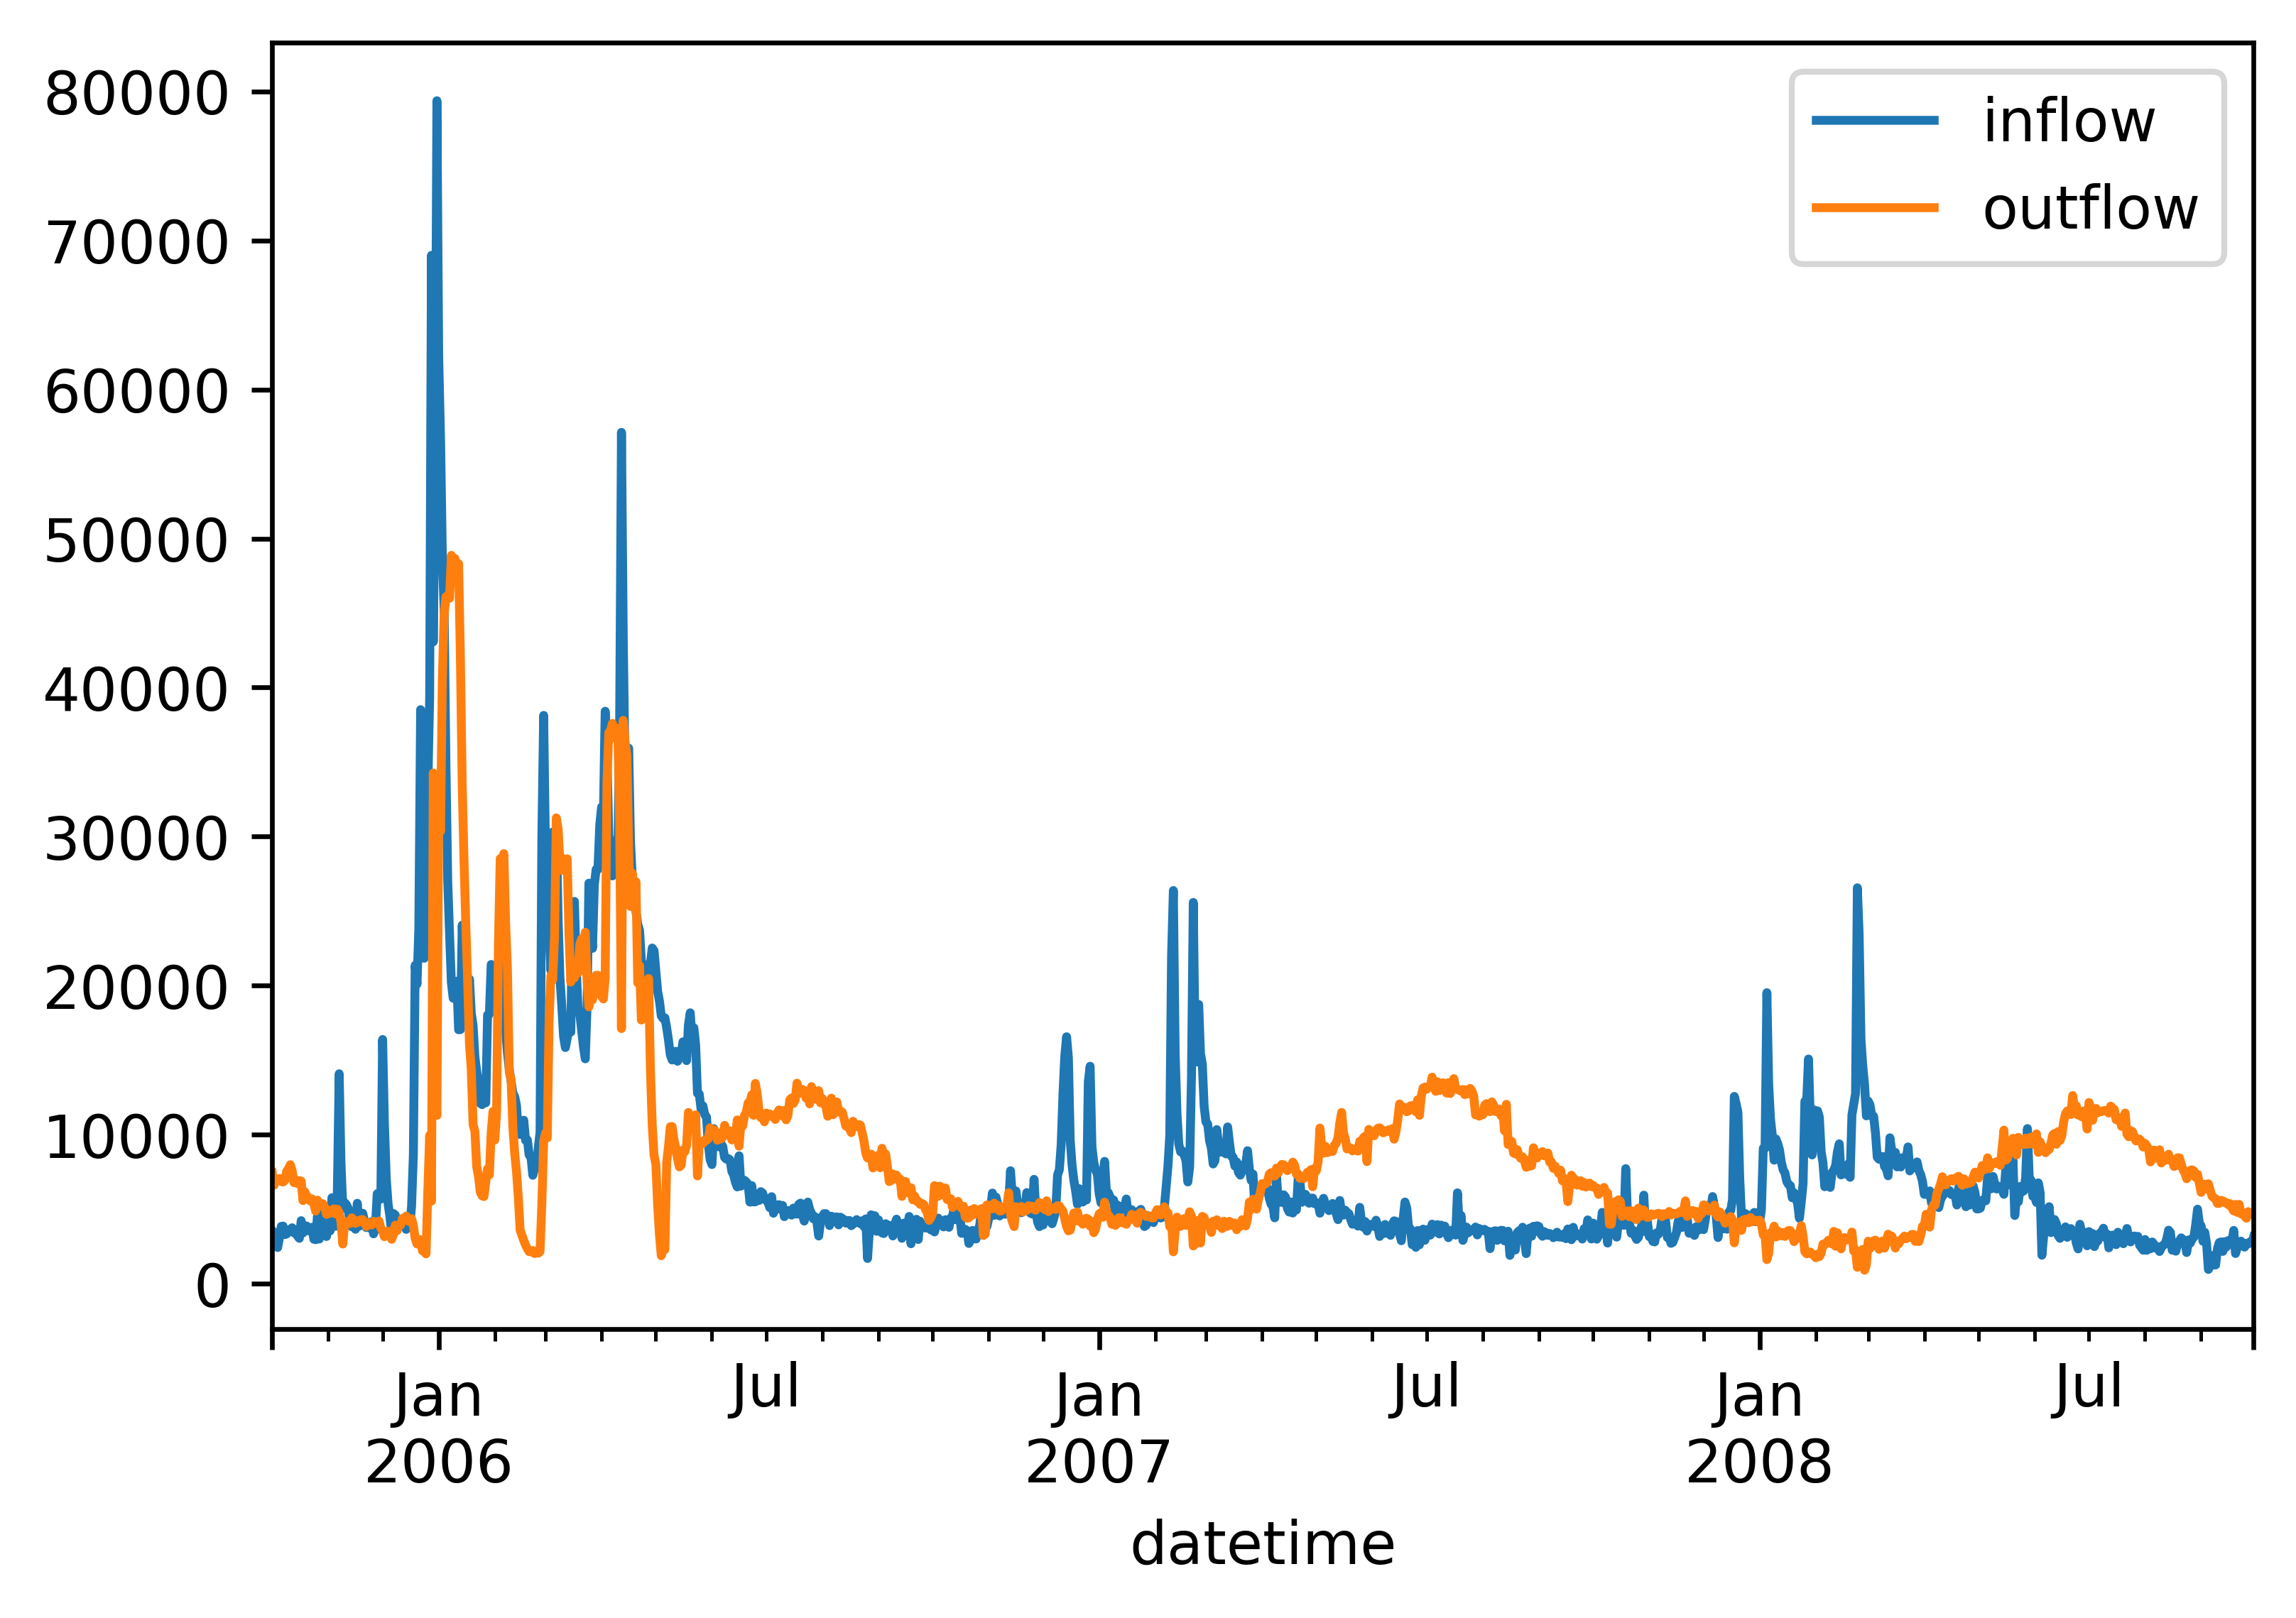

In [9]:
df = df['2005-10-01':'2008-09-30']
df.plot()
plt.show()

You can always go back and forth to `numpy` matrices

In [10]:
matrix = df.values # removes index and header; gives you back a numpy array
print(type(matrix))
print(matrix)

<class 'numpy.ndarray'>
[[3571 7451]
 [3401 6605]
 [3234 6929]
 ...
 [2798 4612]
 [2711 4657]
 [3144 4685]]


To create a dataframe from a matrix, need to provide index and column names

In [11]:
index = pd.date_range('2005-10-01', '2008-09-30', freq='D')
df = pd.DataFrame(matrix, index=index, columns=['inflow','outflow'])
print(df) # this should match the original that we took "matrix" from

            inflow  outflow
2005-10-01    3571     7451
2005-10-02    3401     6605
2005-10-03    3234     6929
2005-10-04    2427     6925
2005-10-05    3093     7057
...            ...      ...
2008-09-26    2708     4393
2008-09-27    2672     4834
2008-09-28    2798     4612
2008-09-29    2711     4657
2008-09-30    3144     4685

[1096 rows x 2 columns]


Plot the cumulative distributions (exceedance):

Note this is also how you add Series to an existing Dataframe

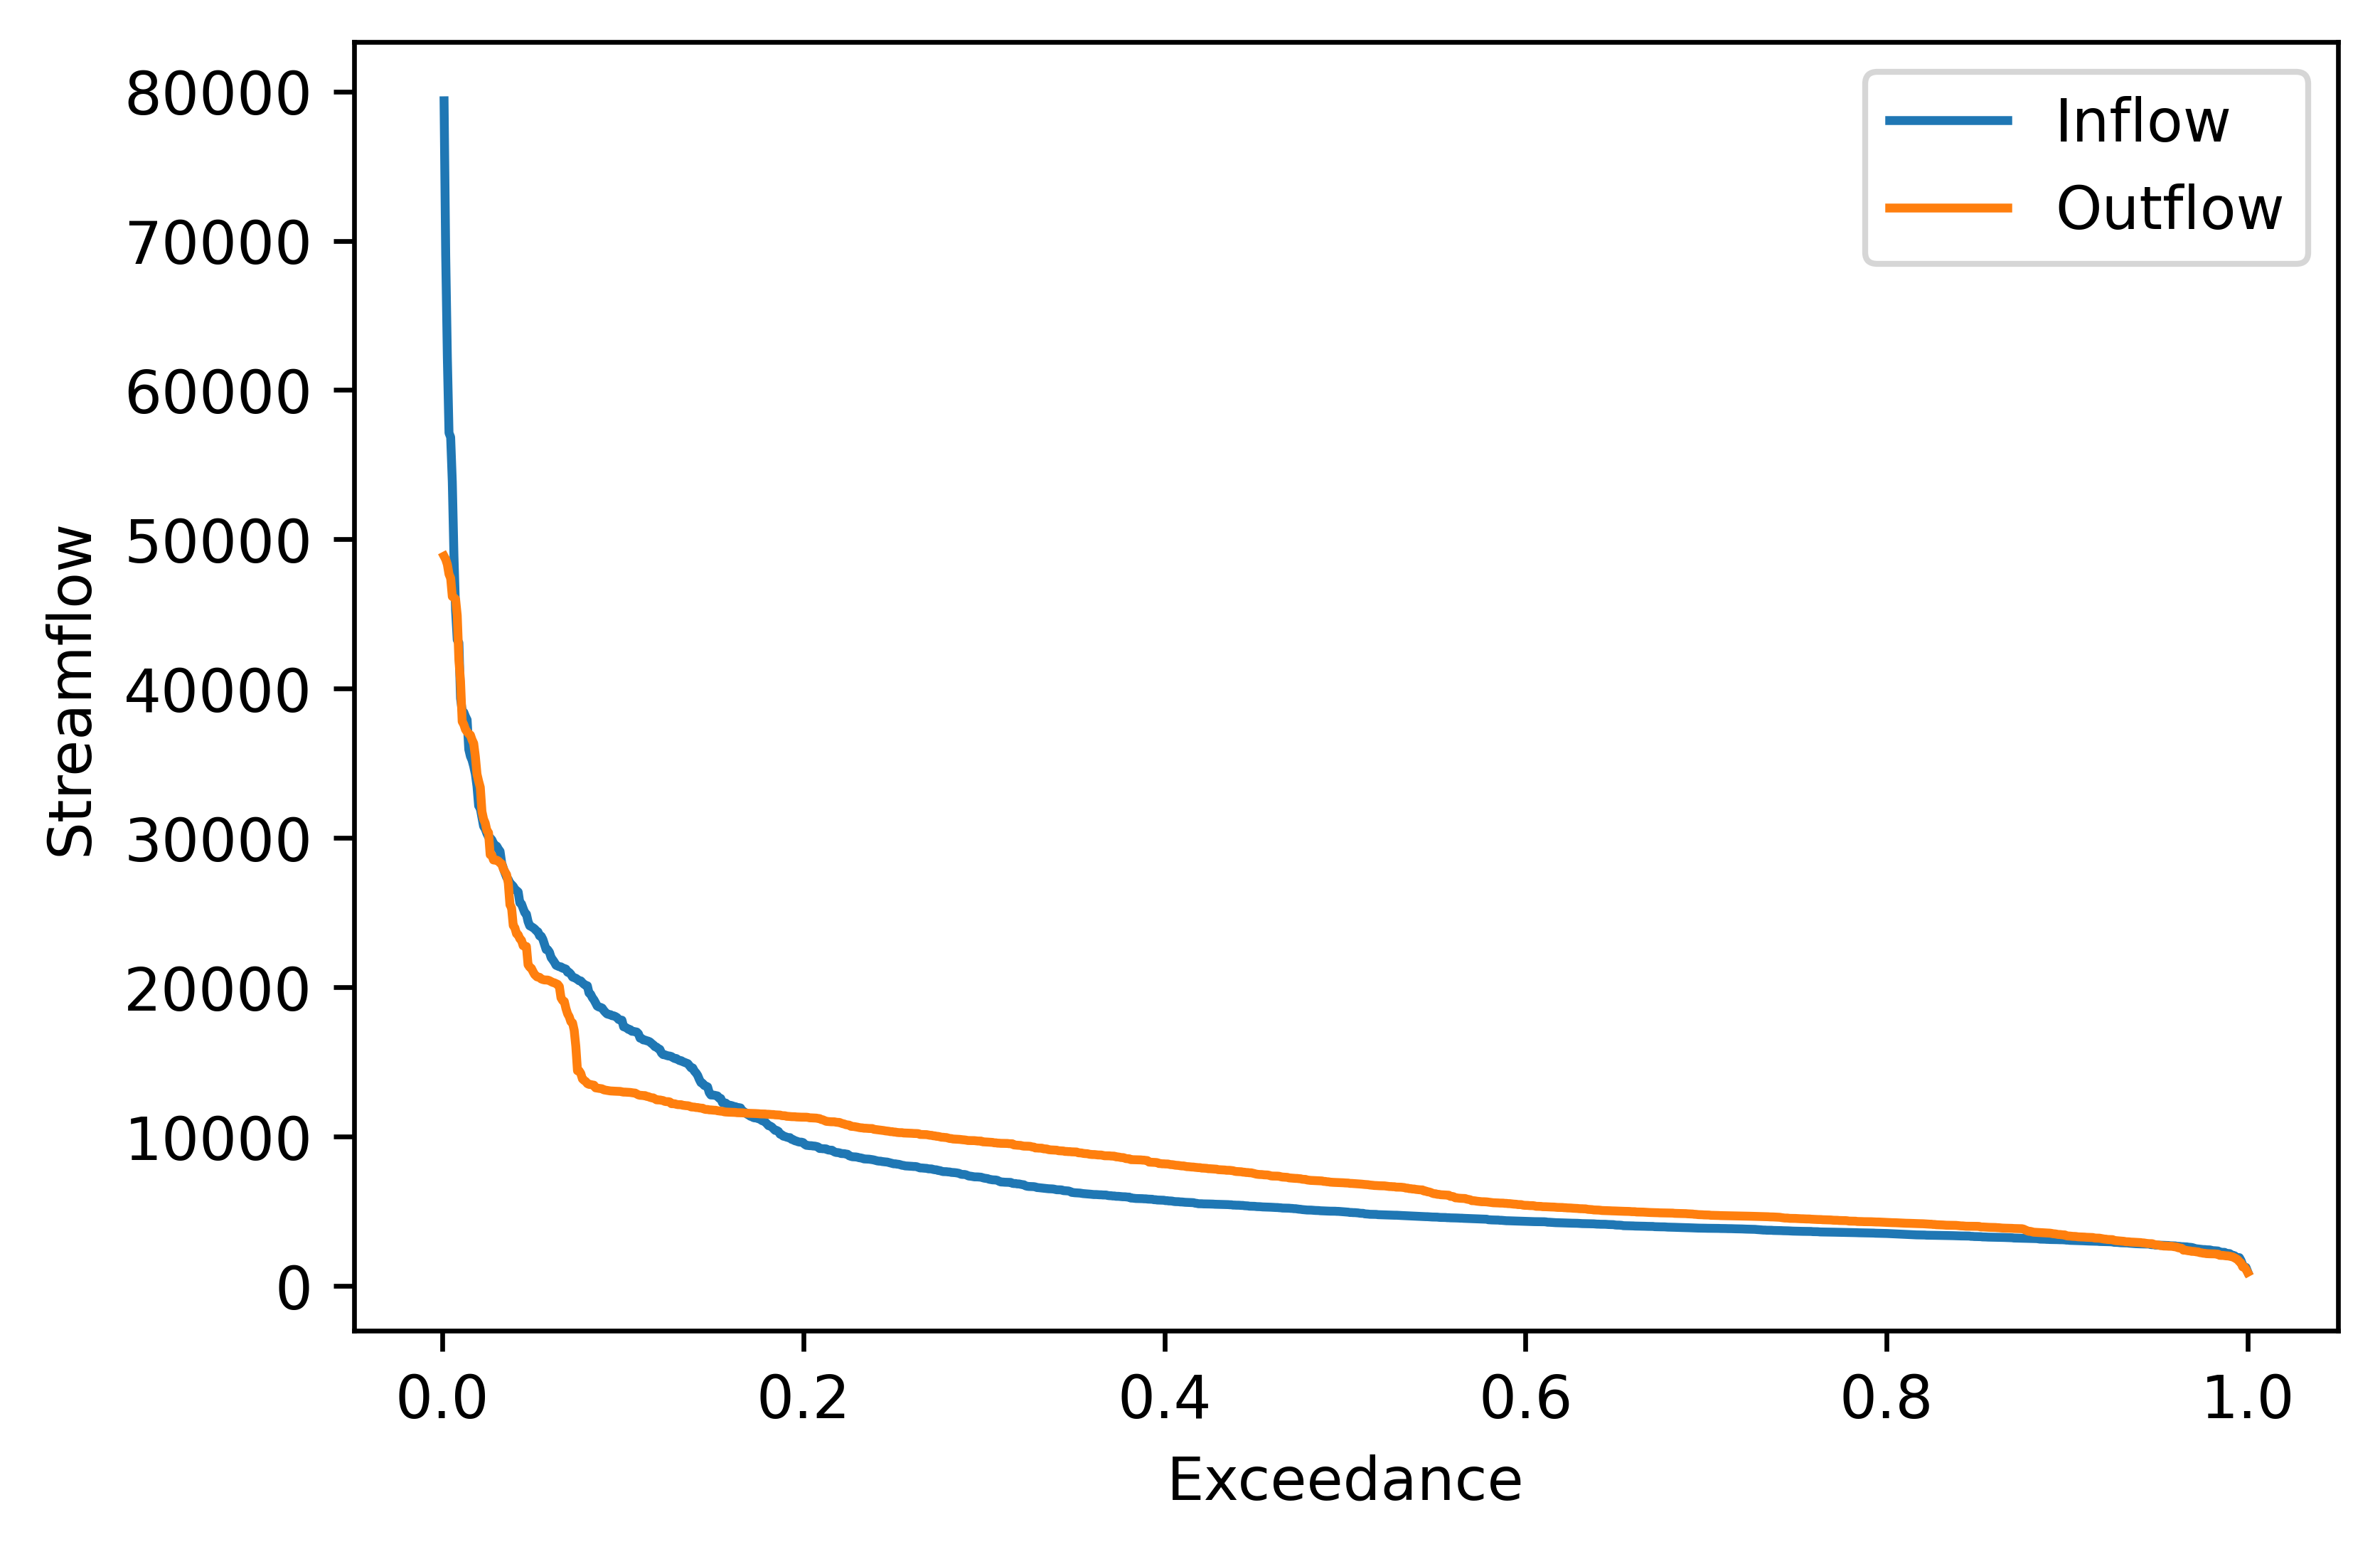

In [12]:
for Q in ['inflow', 'outflow']:
    exceedance = df[Q].rank(ascending=False, pct=True).sort_values() # ranks the exceedance values
    values = df[Q].loc[exceedance.index] # also sort the flow values
    plt.plot(exceedance, values)

plt.legend(['Inflow', 'Outflow'])
plt.ylabel('Streamflow')
plt.xlabel('Exceedance')
plt.show()

Two important functions: `resample` and `rolling`

`resample(frequency)` where frequency is 'A', 'M', 'W'...

`rolling(window)` every day uses the trailing (window) days to calculate

Example: take the 14-day trailing moving average of flows

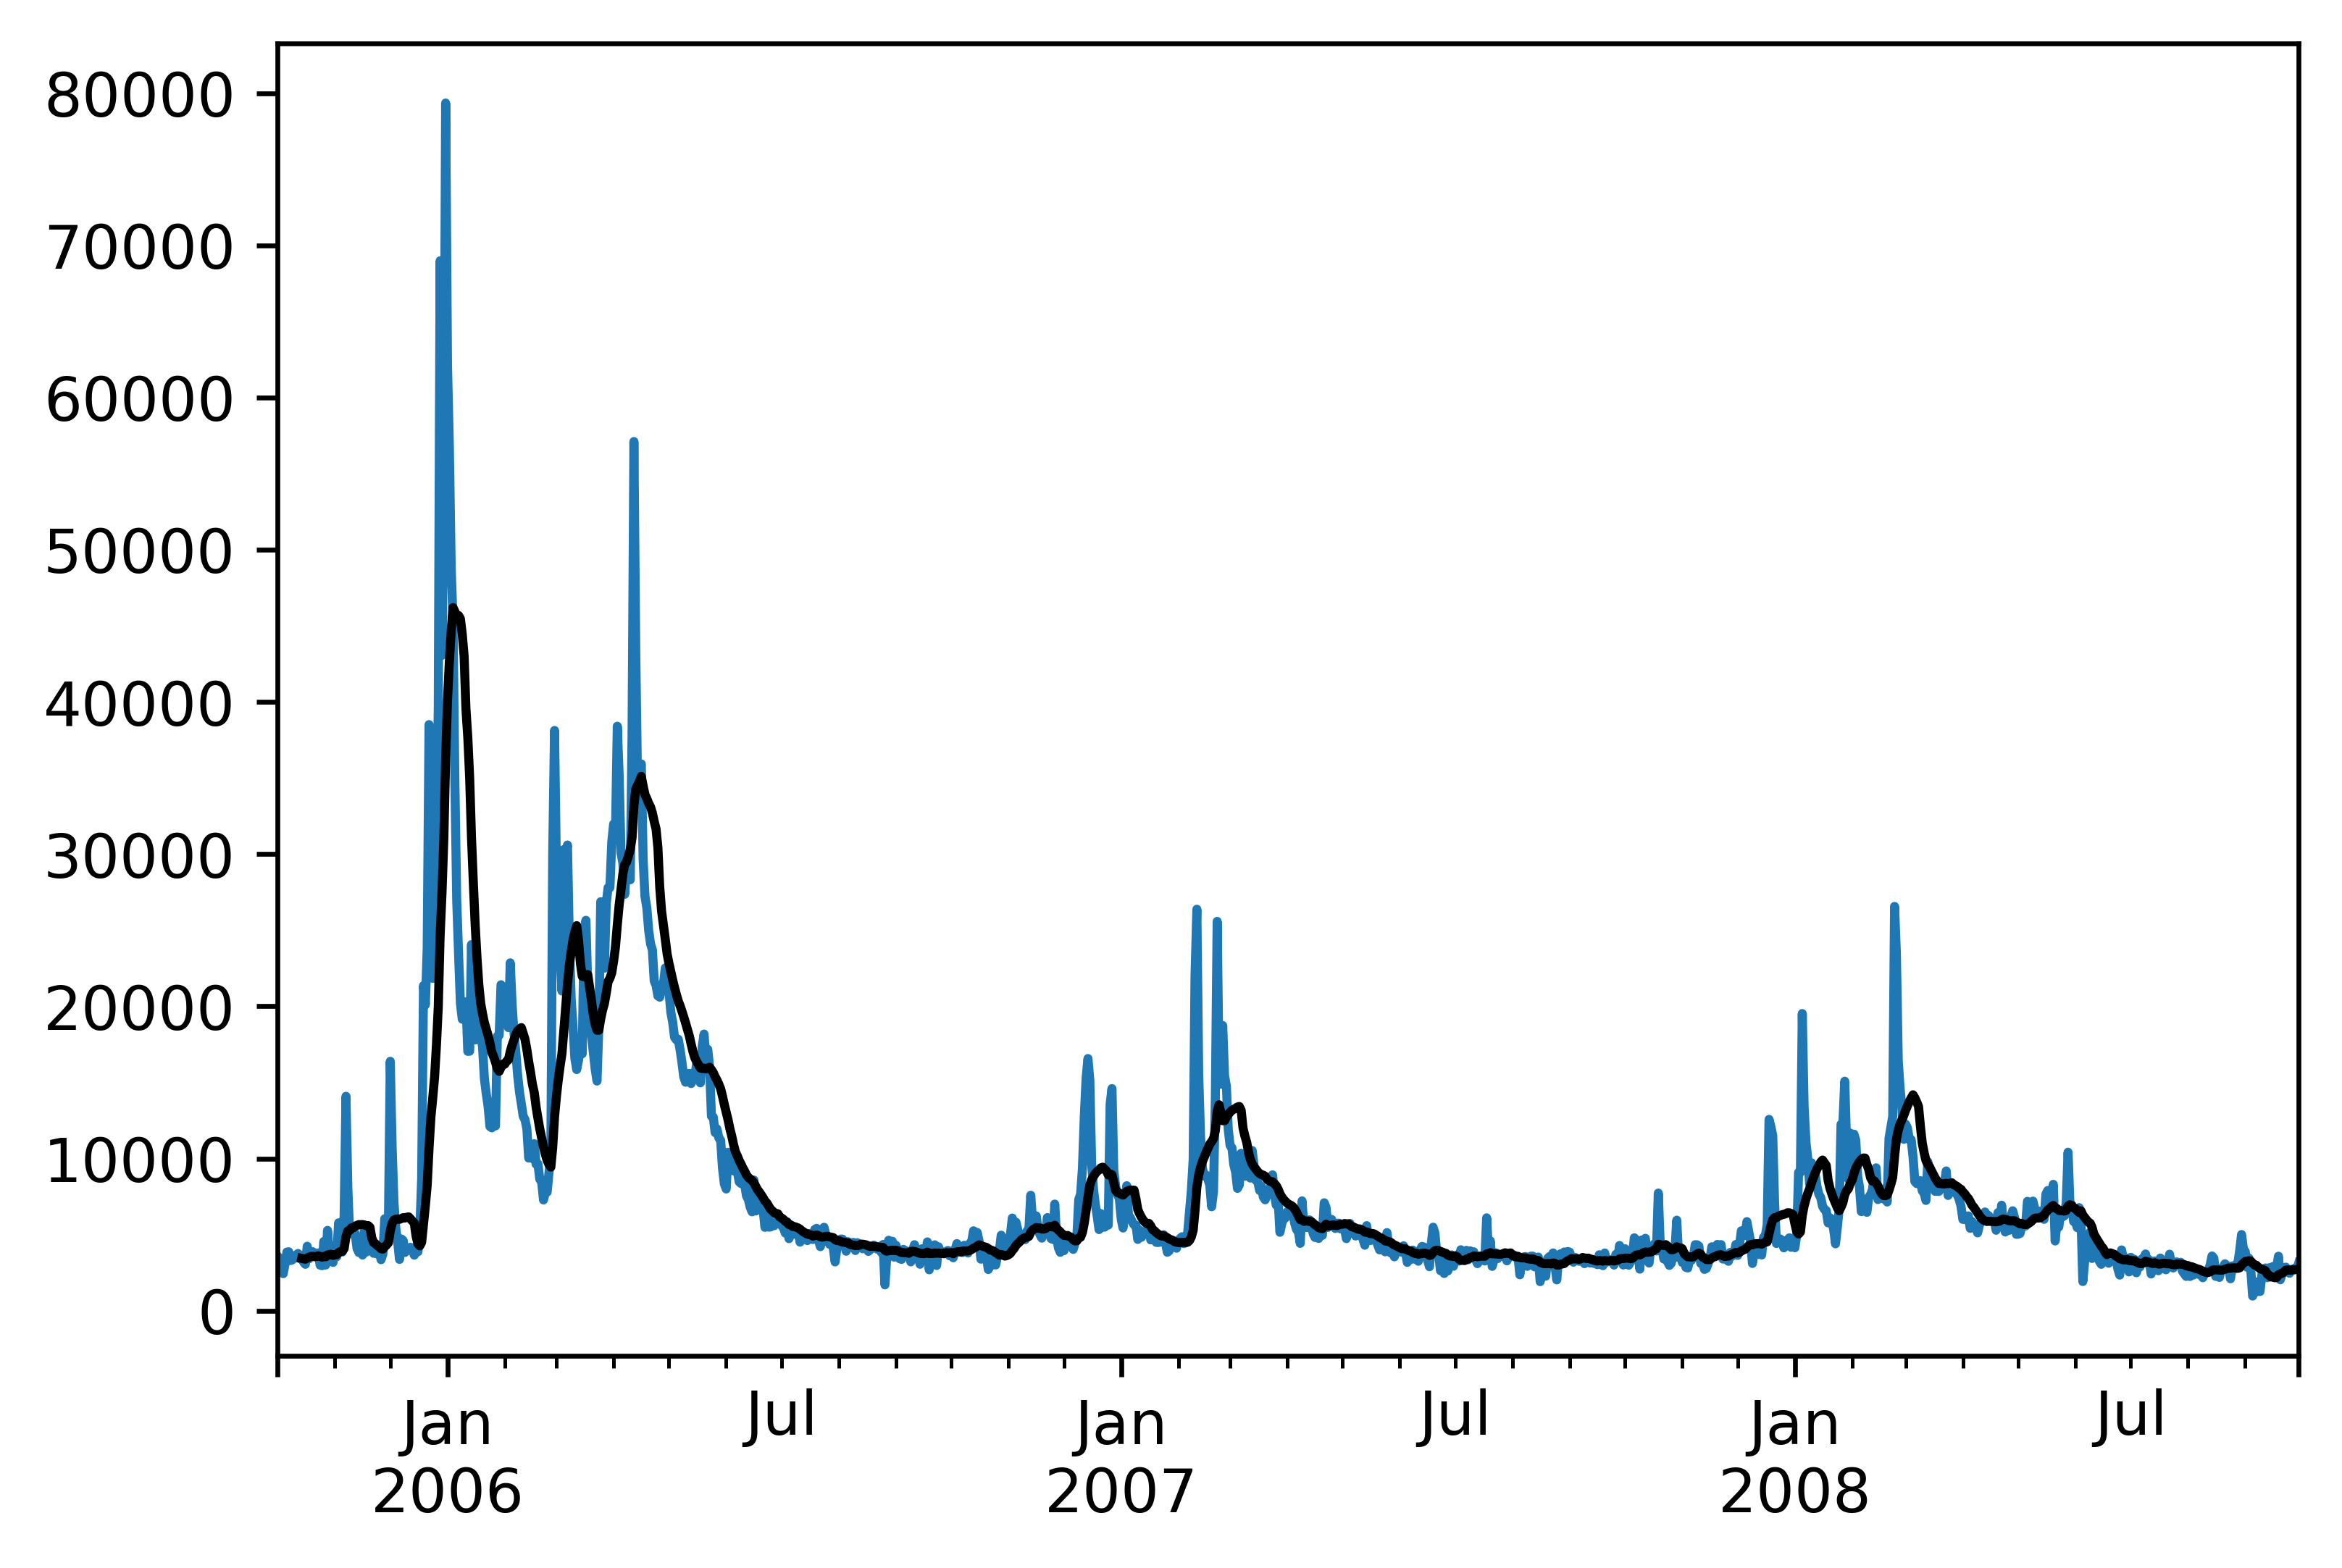

In [13]:
df.inflow.plot()
df.inflow.rolling(14).mean().plot(color='k')
plt.show()

__Resample__ Example: aggregate daily to monthly. Keep track of units.

In [14]:
df = df.resample('M').sum() # resample at a monthly ('M') frequency instead of daily ('D')
print(df)

            inflow  outflow
2005-10-31  109254   196708
2005-11-30  149366   127144
2005-12-31  601508   166839
2006-01-31  718870   802392
2006-02-28  407194   279837
2006-03-31  698188   685427
2006-04-30  883040   776717
2006-05-31  475291   261806
2006-06-30  222314   324300
2006-07-31  150326   374658
2006-08-31  128661   326262
2006-09-30  113536   194723
2006-10-31  121850   161646
2006-11-30  156430   151384
2006-12-31  245047   139039
2007-01-31  159247   137784
2007-02-28  317620   115782
2007-03-31  257675   134168
2007-04-30  171261   222248
2007-05-31  145249   289837
2007-06-30  109649   334254
2007-07-31  113383   398981
2007-08-31  100362   309601
2007-09-30  100597   221409
2007-10-31  124282   161282
2007-11-30  107069   141528
2007-12-31  164794   136352
2008-01-31  271415    94478
2008-02-29  304083    69760
2008-03-31  269164    90481
2008-04-30  175835   190041
2008-05-31  202947   271854
2008-06-30  114666   312250
2008-07-31   94032   338613
2008-08-31   88867  

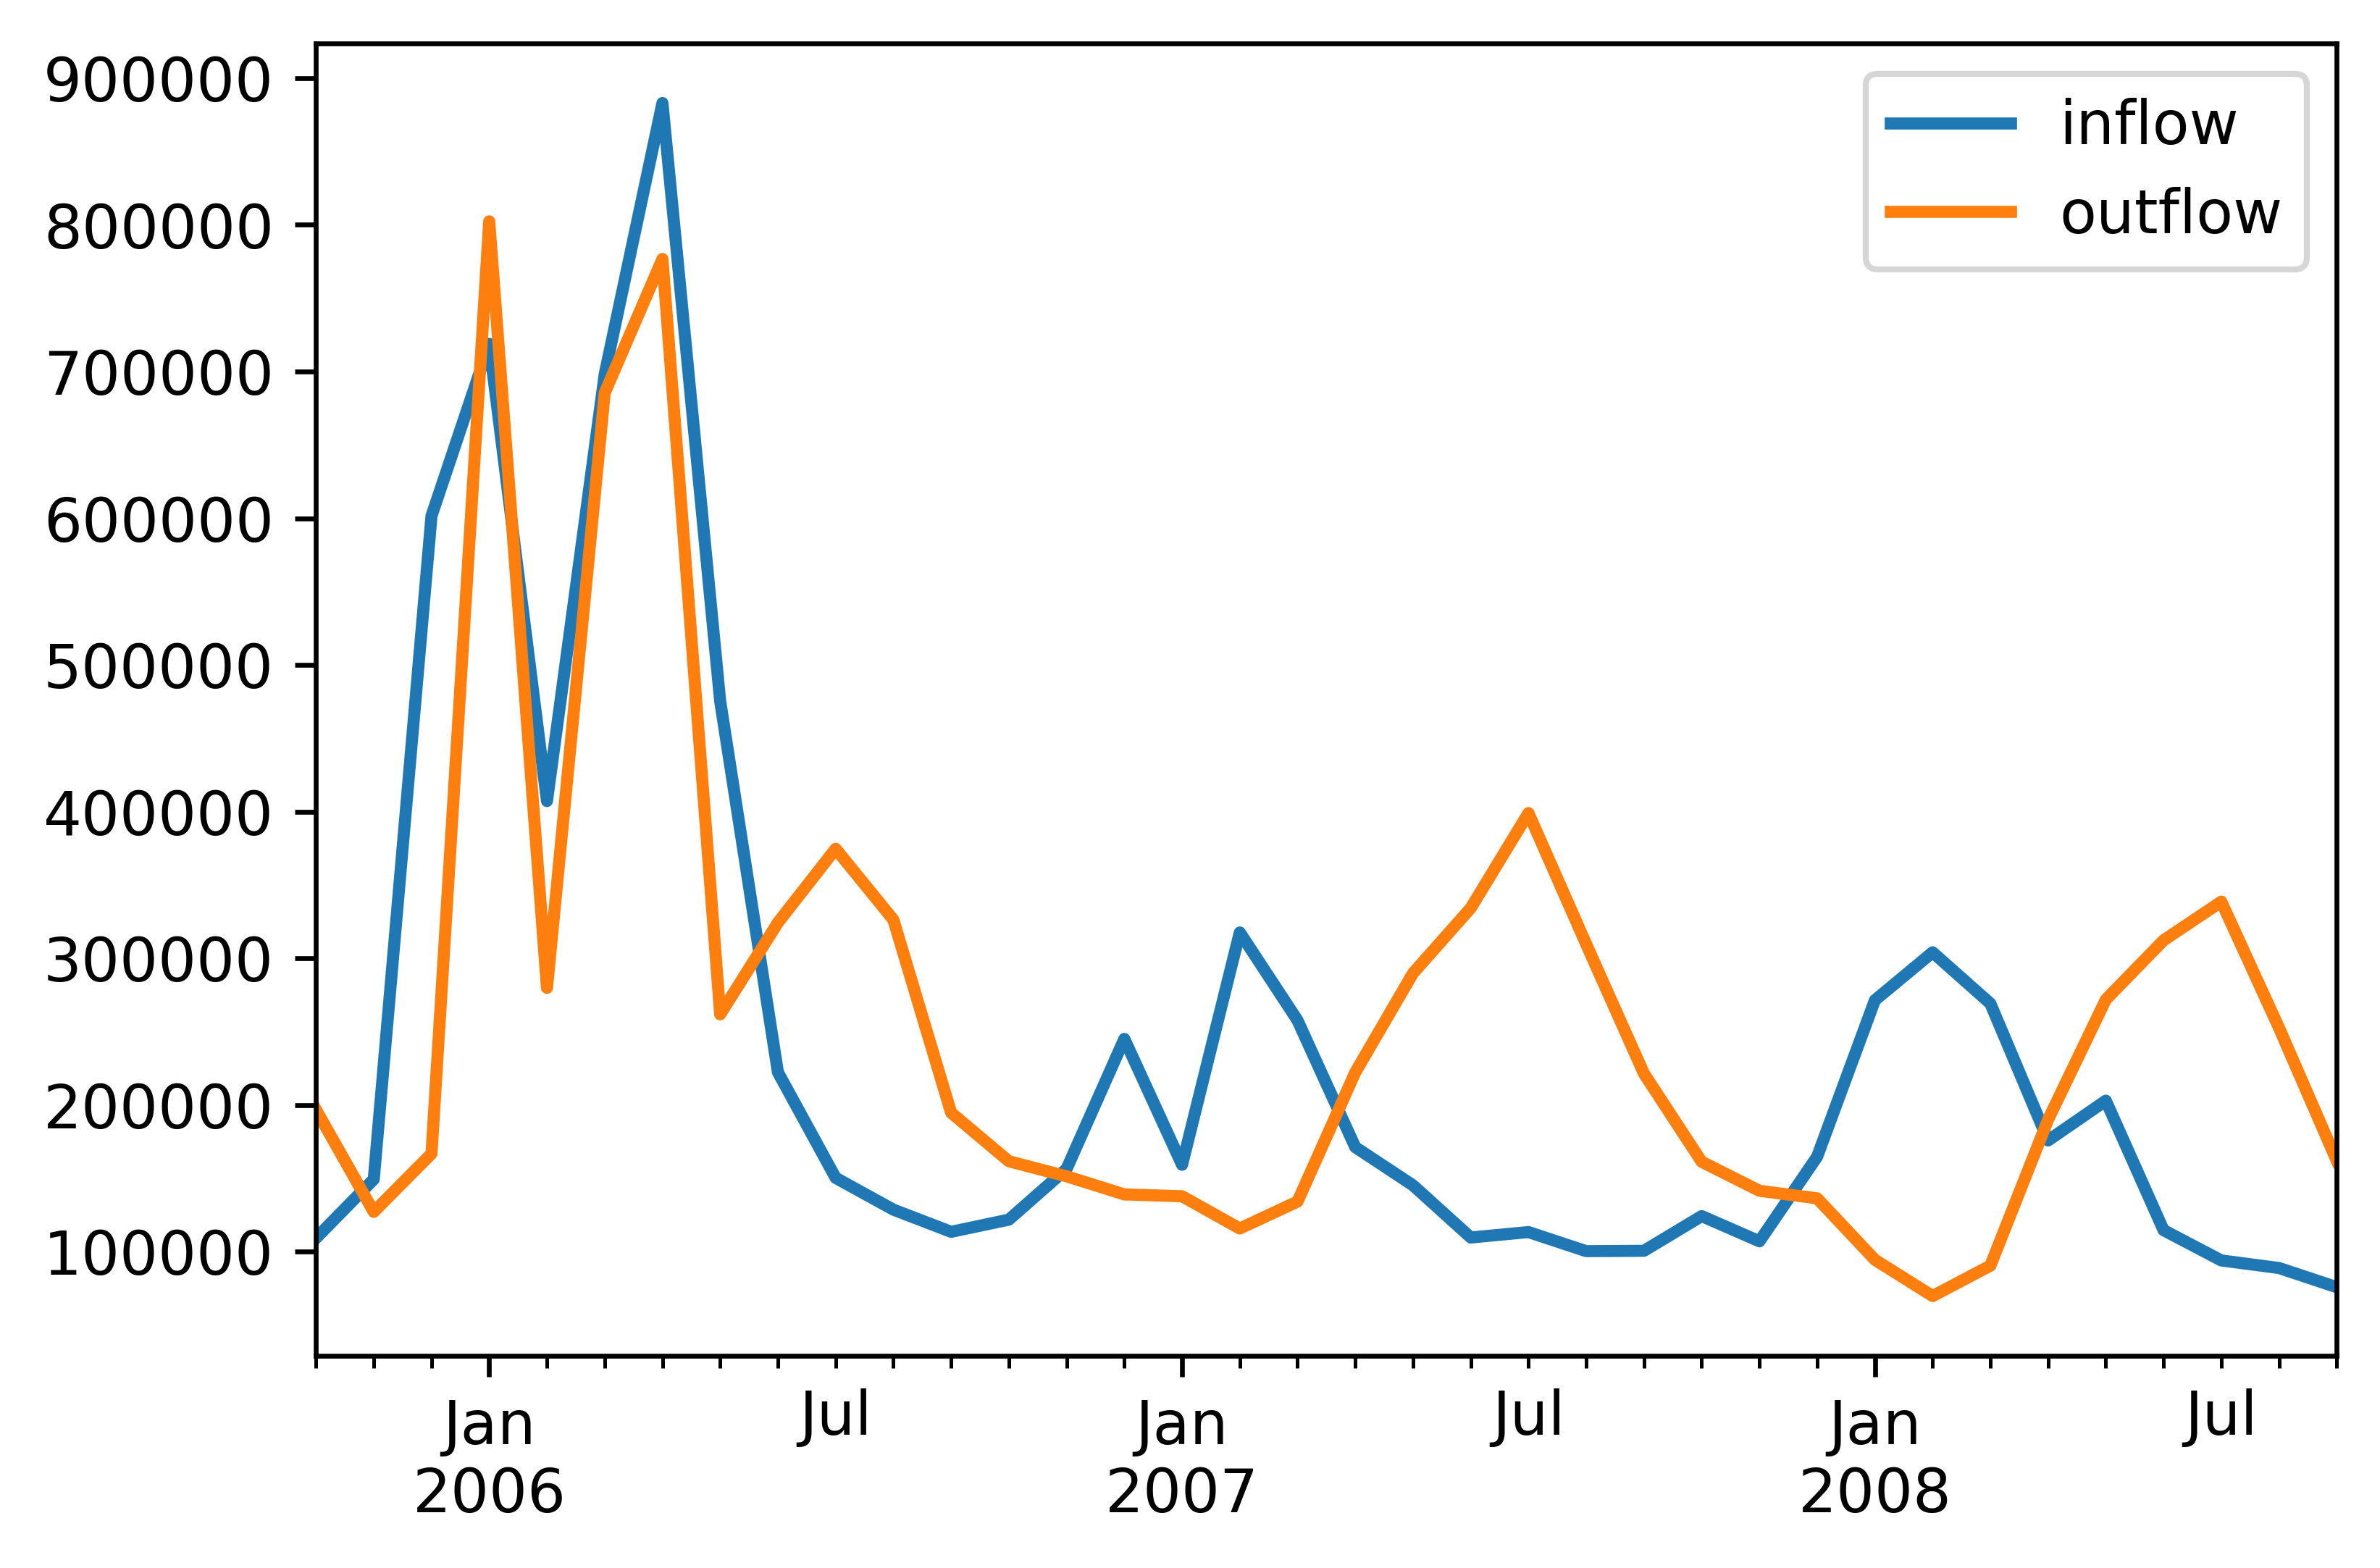

In [15]:
df.plot(linewidth=2)
plt.show()

We can't recover the finer resolution data without more information

In [16]:
df = df.resample('D').mean() # take monthly data and resample to daily
print(df)

              inflow   outflow
2005-10-31  109254.0  196708.0
2005-11-01       NaN       NaN
2005-11-02       NaN       NaN
2005-11-03       NaN       NaN
2005-11-04       NaN       NaN
...              ...       ...
2008-09-26       NaN       NaN
2008-09-27       NaN       NaN
2008-09-28       NaN       NaN
2008-09-29       NaN       NaN
2008-09-30   75785.0  162002.0

[1066 rows x 2 columns]


Resampling to water year frequency:

In [17]:
df = df.resample('AS-OCT').sum()
print(df)

               inflow    outflow
2005-10-01  4657548.0  4516813.0
2006-10-01  1998370.0  2616133.0
2007-10-01  1992939.0  2221185.0


A full list of __frequency strings__ is here:

https://stackoverflow.com/questions/17001389/pandas-resample-documentation

-----------

## _Lake Berryessa indicators of hydrologic alteration_

Some Indicators of Hydrologic Alteration (IHA) examples

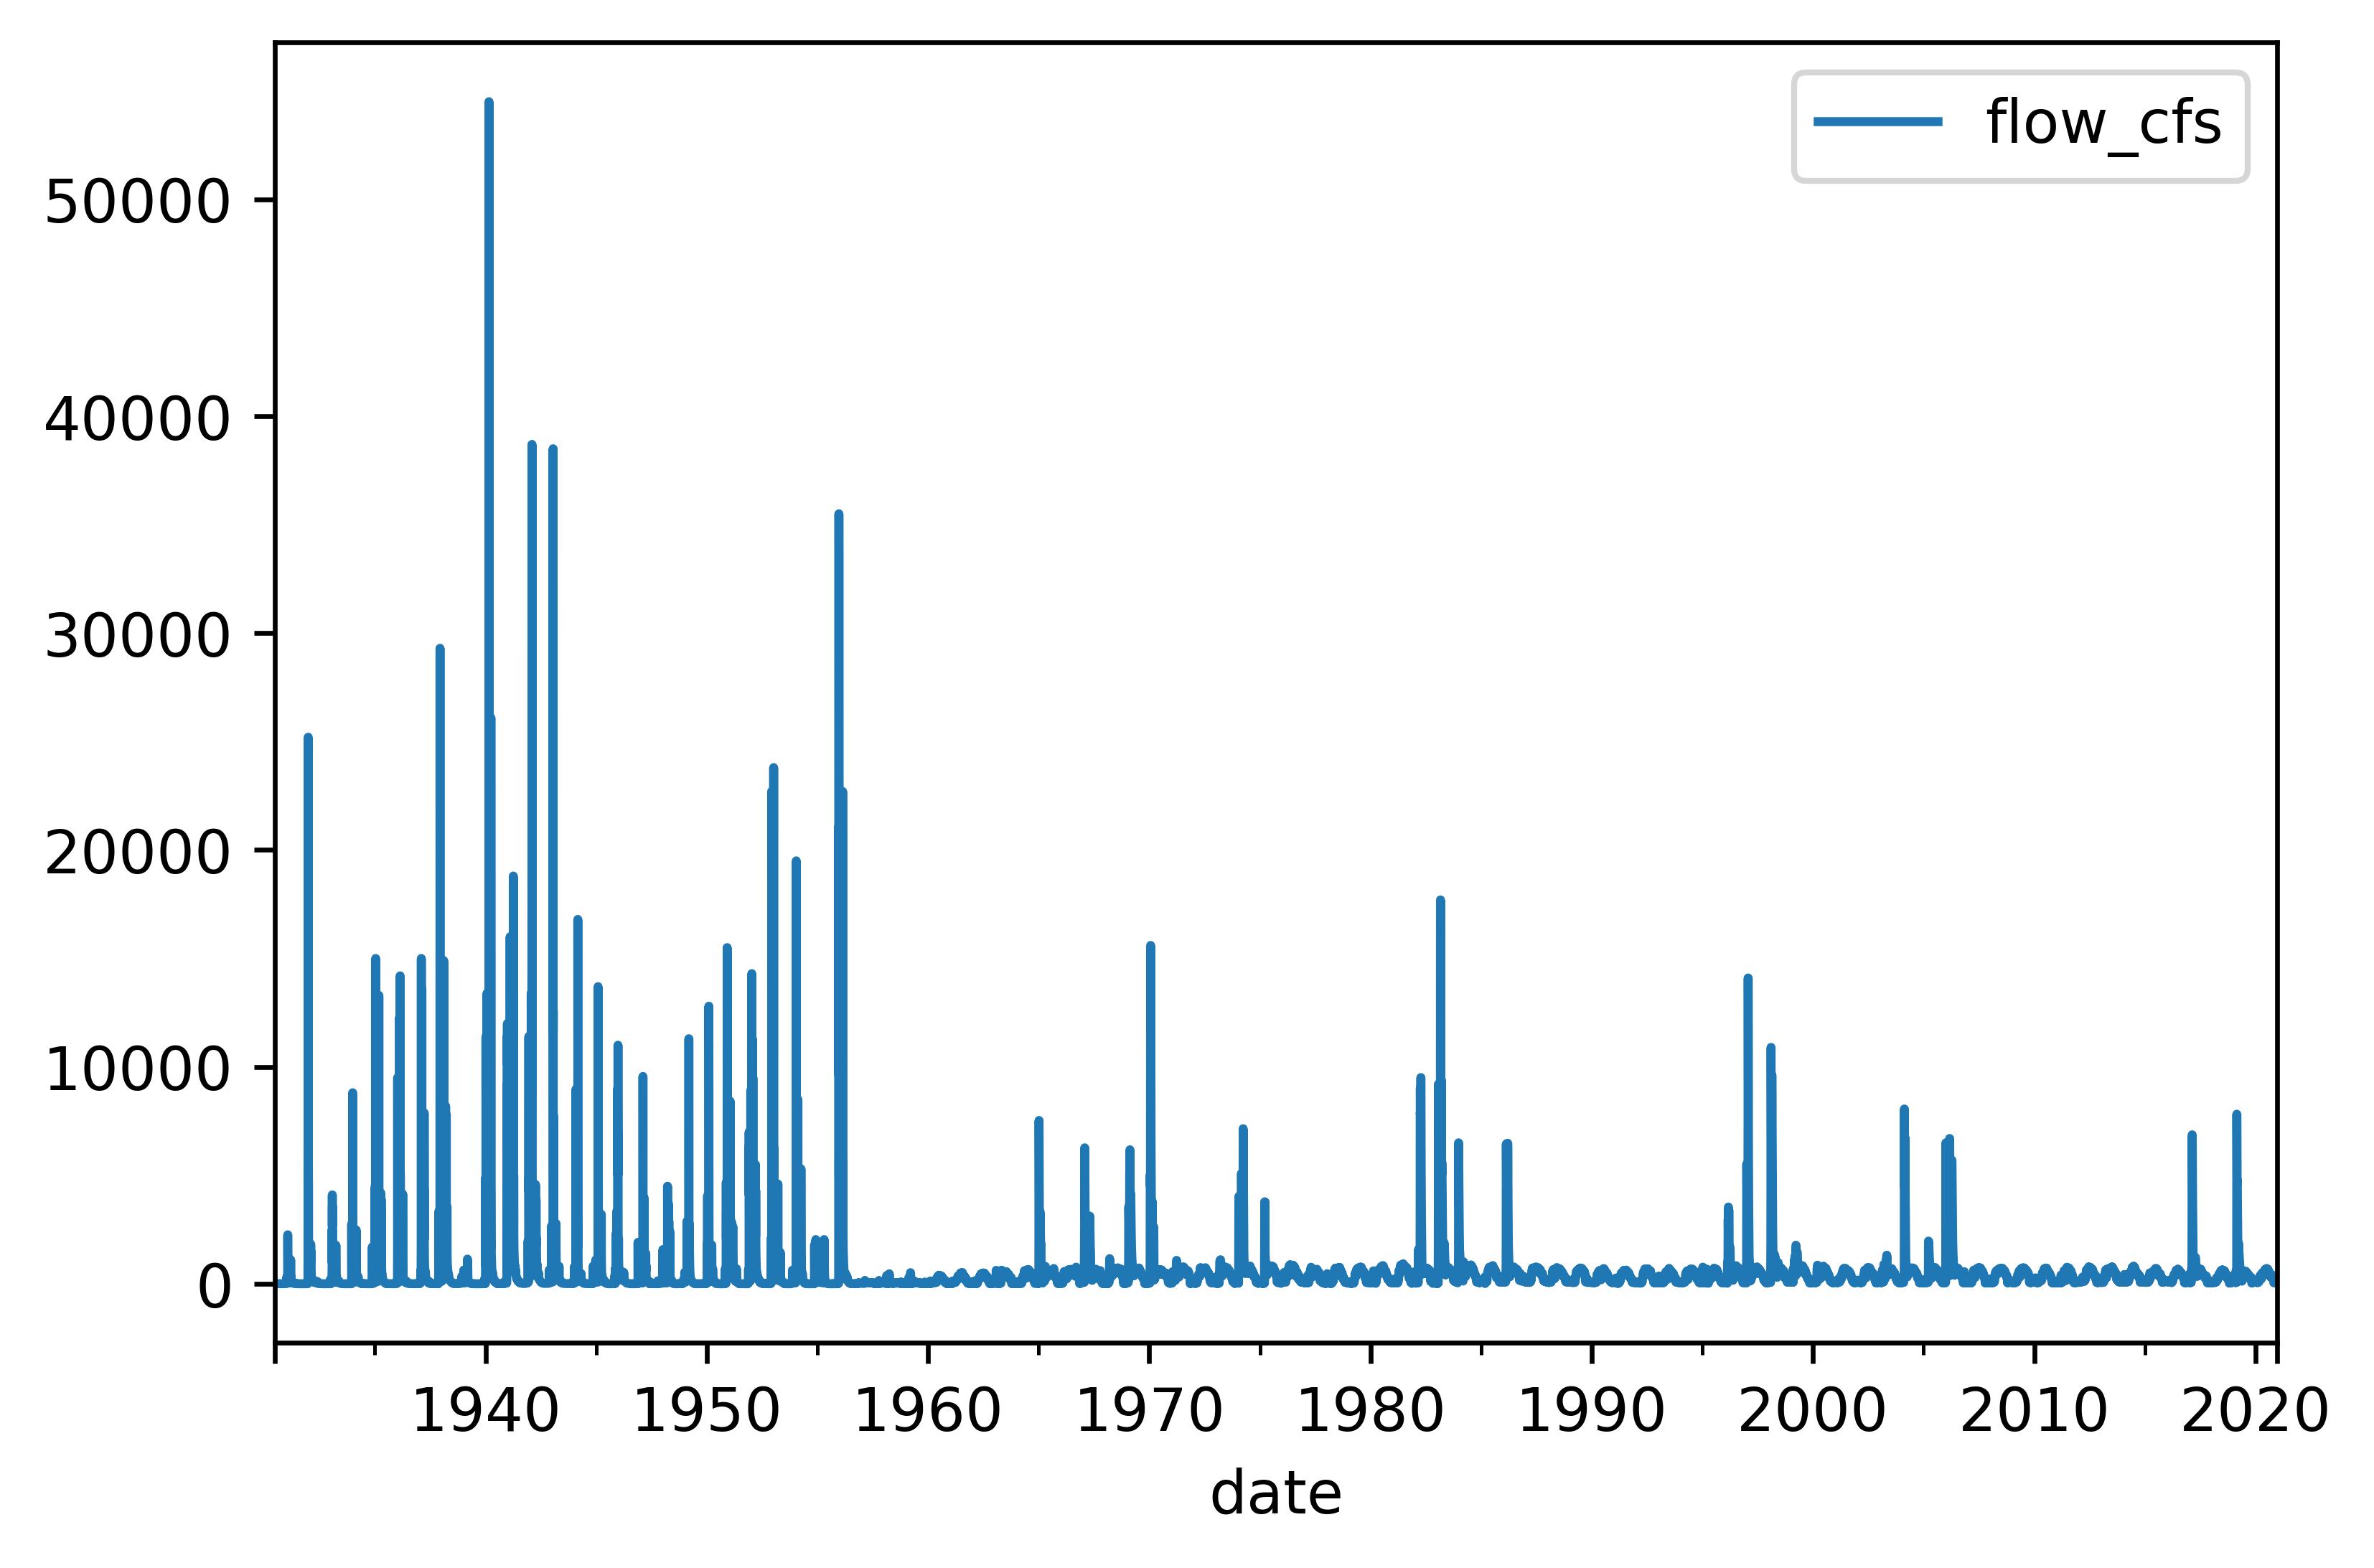

In [19]:
# Data from USGS 11454000
df = pd.read_csv('data/putah-winters.csv', 
  index_col=0, parse_dates=True)

df.plot()
plt.show()

__First:__ how much does the reservoir alter the 3-day peak flow?

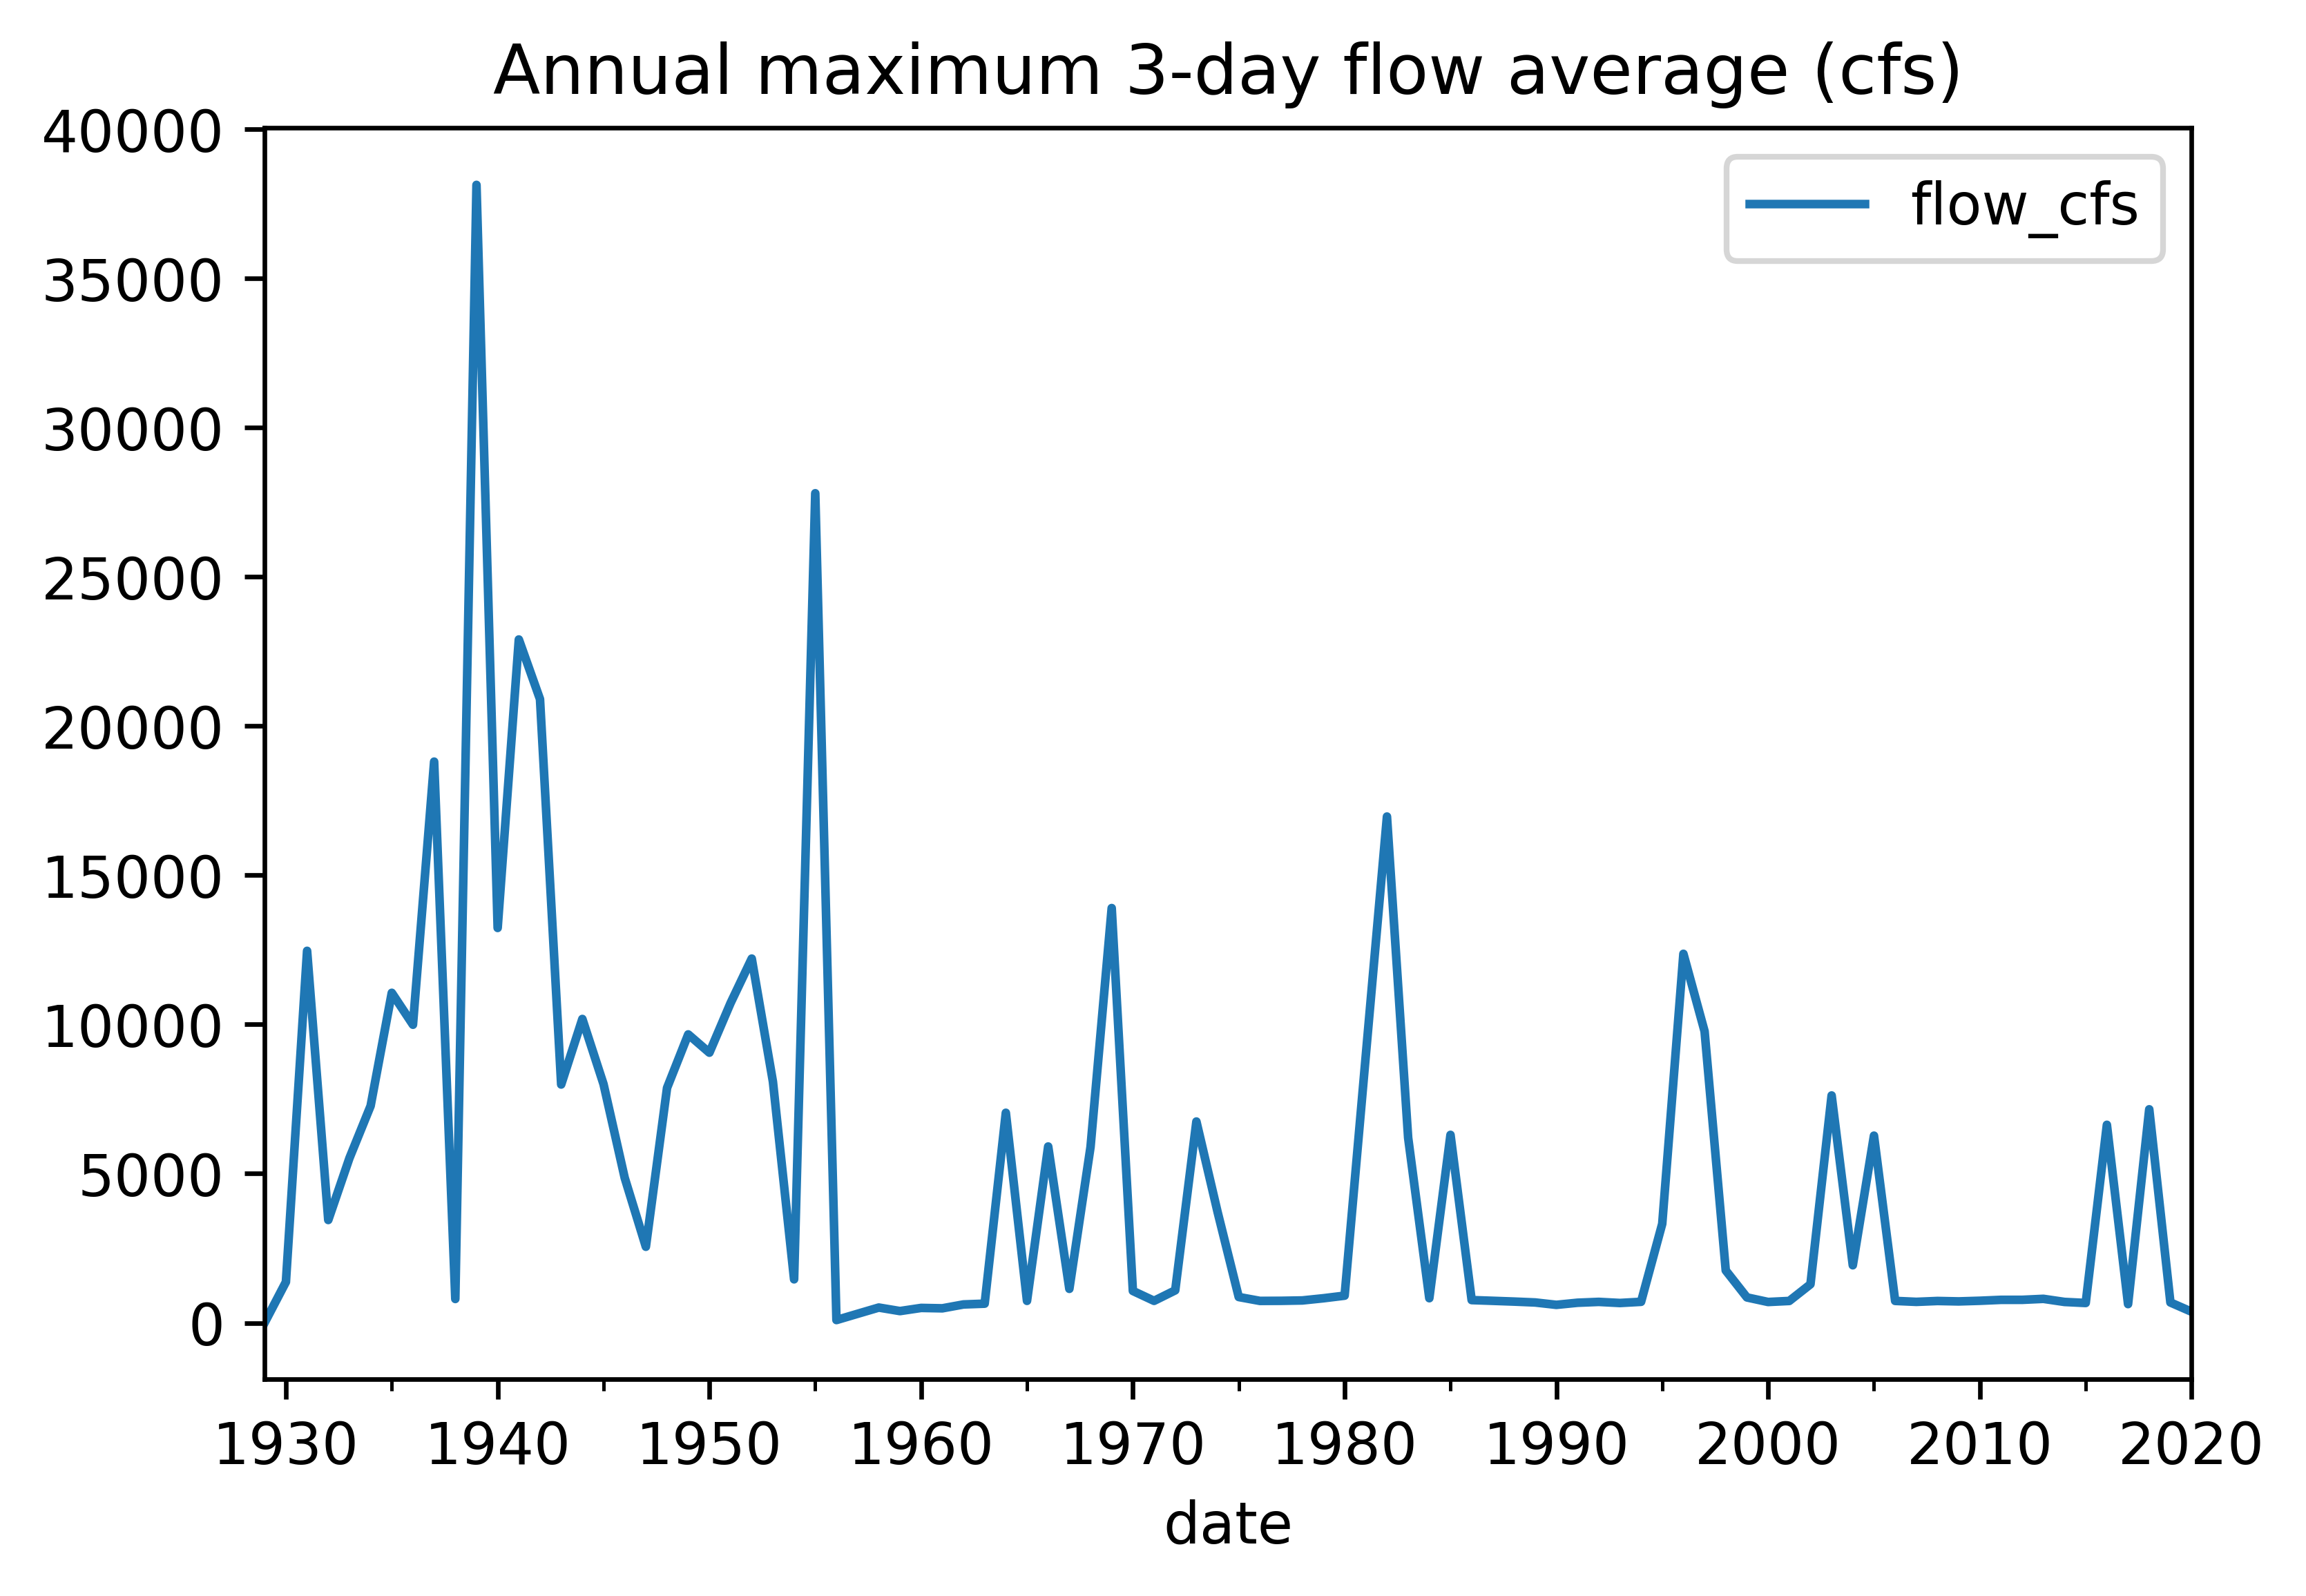

In [20]:
max3day = df.rolling(3).mean().resample('AS-OCT').max() # moving 3-day window over the timeseries and take the mean; for every year find the largest one
max3day.plot()
plt.title('Annual maximum 3-day flow average (cfs)')
plt.show()

What's the average before and after the dam was built?

In [21]:
predam_avg = max3day[:'1957'].mean()
postdam_avg = max3day['1957':].mean()
print('Pre-Dam 3-day peak flow: %0.2f cfs, Post-dam: %0.2f cfs' % (predam_avg, postdam_avg))

Pre-Dam 3-day peak flow: 9887.86 cfs, Post-dam: 2675.35 cfs


__Next:__ how much does the reservoir alter the 30-day minimum flow?

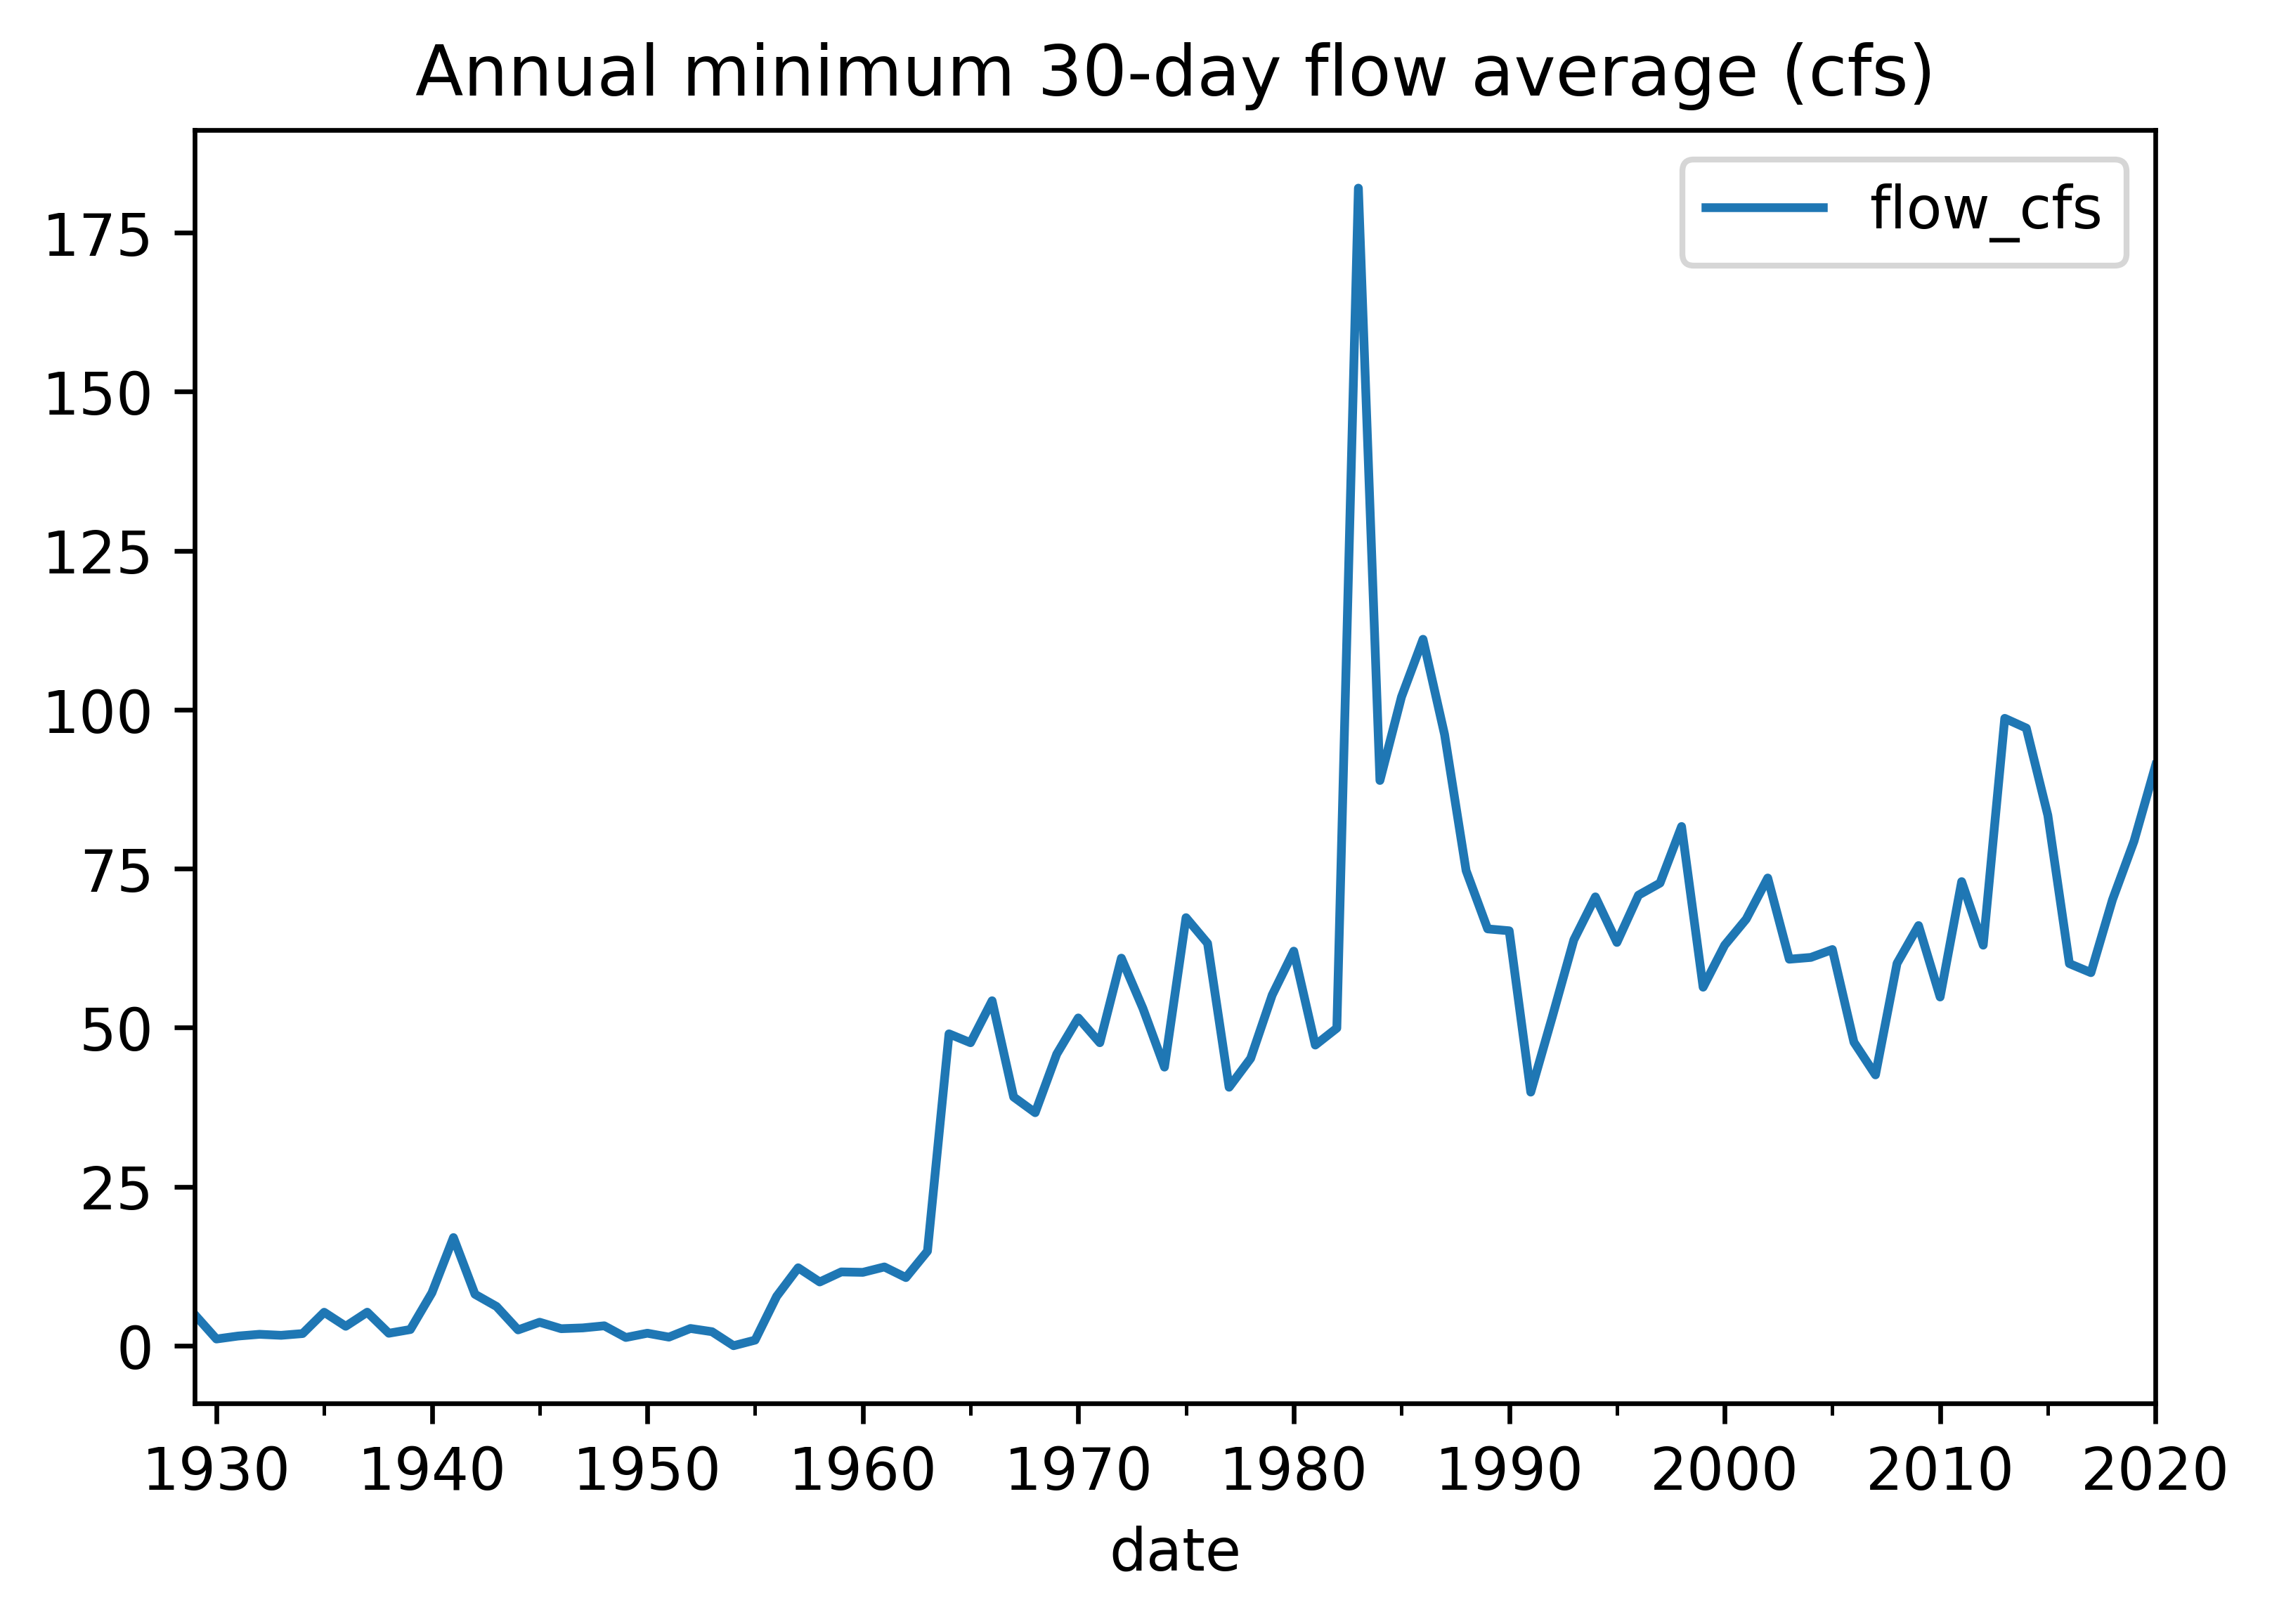

In [22]:
min30day = (df.rolling(30).mean().resample('AS-OCT').min()) # moving 30-day window over the timeseries and take the mean; for every year find the smallest one
min30day.plot()
plt.title('Annual minimum 30-day flow average (cfs)')
plt.show()

What's the average before and after the dam was built?

In [23]:
predam_avg = min30day[:'1957'].mean()
postdam_avg = min30day['1957':].mean()
print('Pre-Dam 30-day min flow: %0.2f cfs, Post-dam: %0.2f cfs' % (predam_avg, postdam_avg))

Pre-Dam 30-day min flow: 3.98 cfs, Post-dam: 59.90 cfs


__Last:__ alteration to peak flow timing

This is a trickier one; we can write a custom function to apply

This custom function will be applied to each water year

In [24]:
def day_of_peak(x):
    d = x.idxmax().dayofyear # get the date of the peak flow
    return (d - 274 if d >= 274 else d + 91) # convert calendar day to water-year day

Apply the function to get a new series of just the integer days each year

In [25]:
peak_day = df.resample('AS-OCT').apply(day_of_peak) # apply the custom function to every year of the dataframe

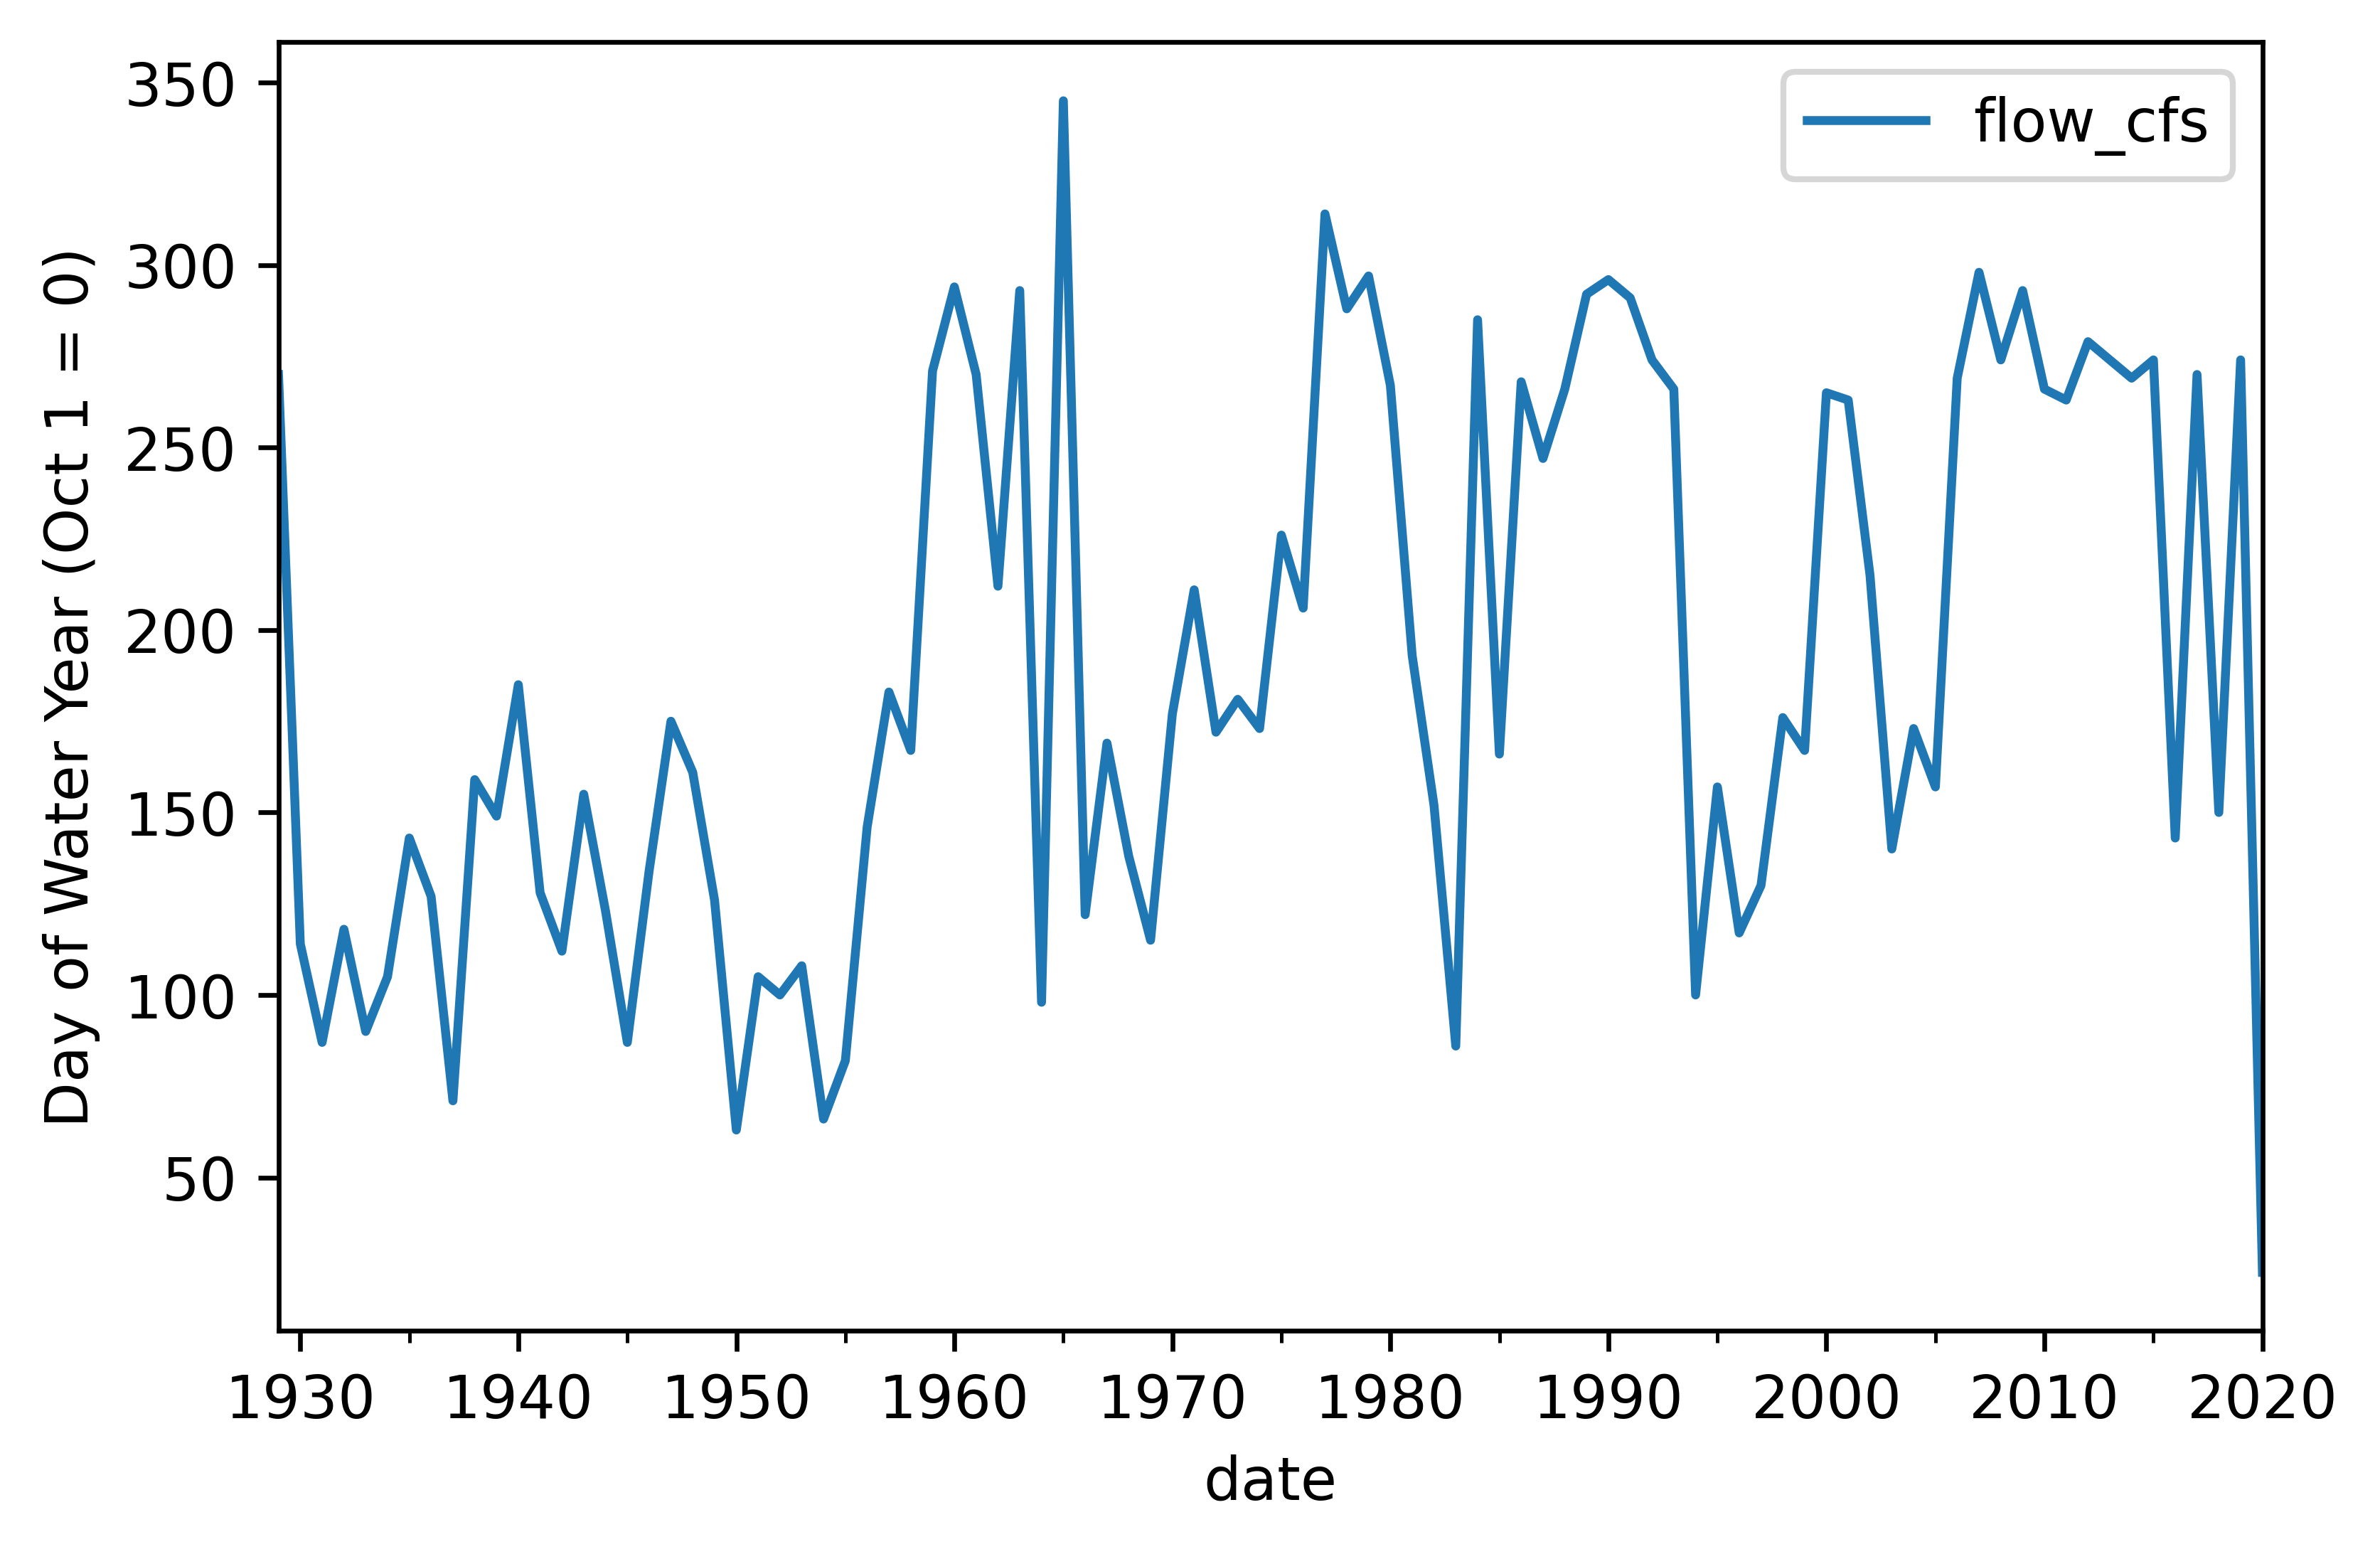

In [26]:
peak_day.plot()
plt.ylabel('Day of Water Year (Oct 1 = 0)')
plt.show()

What's the average before and after the dam was built?

In [27]:
predam_avg = peak_day[:'1957'].mean()
postdam_avg = peak_day['1957':].mean()
print('Pre-Dam DOWY peak flow: %d, Post-dam: %d' % (predam_avg, postdam_avg))

Pre-Dam DOWY peak flow: 126, Post-dam: 217


--------

## _Simulation Model_

What is the tradeoff between water supply reliability and hydrologic alteration?

In [28]:
def simulate(K, D, Q):
    T = len(Q)
    S = np.zeros(T)
    R = np.zeros(T) # release is outflow intended to meet demand
    spill = np.zeros(T) # spill we can't control if water exceeds reservoir capacity

    S[0] = K # start simulation full
    R[0] = min(D, Q[0]) # fix

    for t in range(1,T):
        spill[t-1] = max(S[t-1] + Q[t-1] - R[t-1] - K, 0)
        S[t] = S[t-1] + Q[t-1] - R[t-1] - spill[t-1]

        if S[t] + Q[t] > D:
            R[t] = D
        else:
            R[t] = S[t] + Q[t]

    alteration = np.abs(Q - R - spill).sum() / Q.sum() 
    return R[R==D].size / float(T), alteration

Data setup

In [30]:
Q = np.loadtxt('data/FTO-FNF.csv', delimiter=',', 
               skiprows=1, usecols=[1])
Q /= 1000 # TAF
D = 300 # target demand, TAF/month

K = np.arange(0,10000,100) # make an array of storage values
reliability = np.zeros(len(K)) # we'll calculate these for each K
alteration = np.zeros(len(K))

for i in range(len(K)):
    reliability[i], alteration[i] = simulate(K[i], D, Q) 
# how to limit hydrologic alteration? Try to mimic natural flows

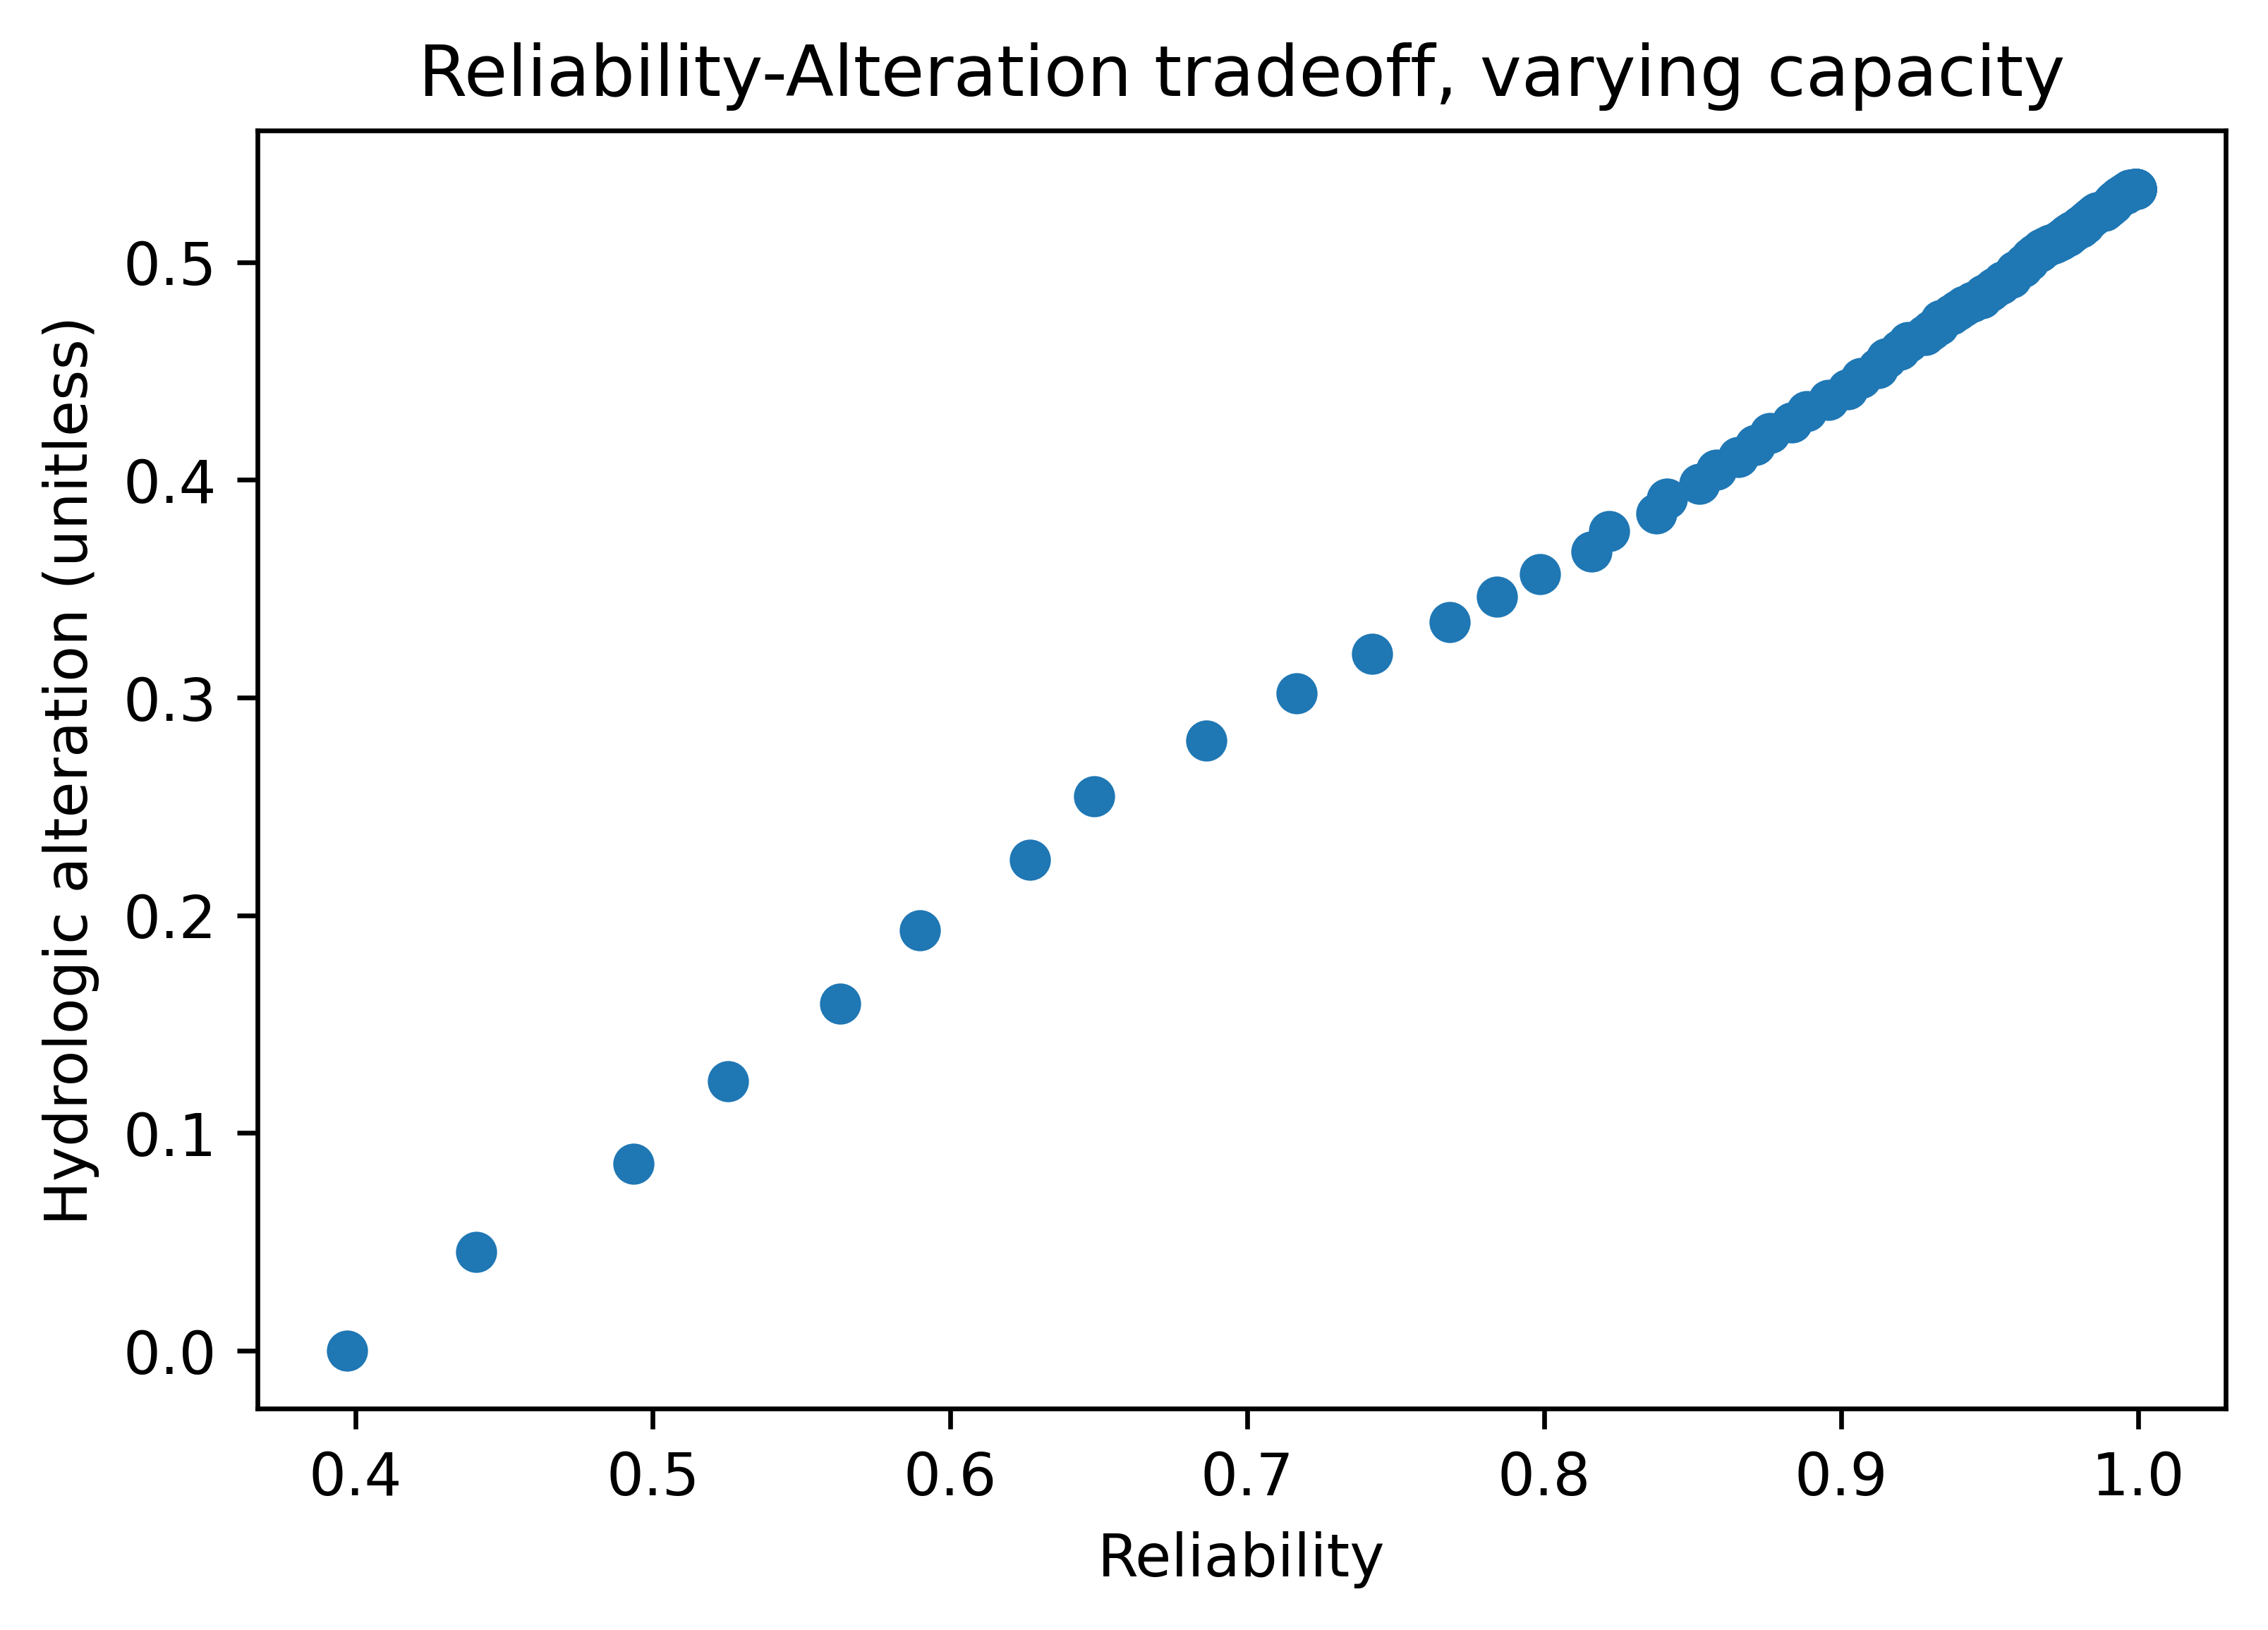

In [31]:
plt.scatter(reliability, alteration) # as you change the capacity, plot the two arrays against each other, assuming inflow and demand stays the same
plt.xlabel('Reliability')
plt.ylabel('Hydrologic alteration (unitless)')
plt.title('Reliability-Alteration tradeoff, varying capacity')
plt.show()

------